In [9]:
import networkx as nx
import pandas as pd
import numpy as np
import json
import cdlib                 # pip install cdlib #
from cdlib import evaluation
from cdlib import algorithms
from cdlib import viz
from cdlib import ensemble
from cdlib import readwrite
import pickle
import pquality             # pip install pquality #
import matplotlib.pyplot as plt
%matplotlib inline
from nf1 import NF1
from cdlib import NodeClustering

Note: to be able to use all crisp methods, you need to install some additional packages:  {'graph_tool'}


In [ ]:
path = "../Dataset FFF/"

In [ ]:
path_graph = '../Dataset FFF/Graph_data/'

In [18]:
G = nx.read_graphml("Real_Network.graphml")

In [10]:
#Da utilizzare per i confronti
def scatter_plot(sizes, title):
    fig = plt.figure(figsize=(16,8), dpi= 150)
    ax = fig.add_subplot(111)

   
    labels = []
    for i in sizes:
        plt.scatter(i[0], i[1], alpha=0.5)
        labels.append(i[2])
    
    
    
    fontsize = 15
    
    #plt.yticks(ticks=y_list, labels=y_list, fontsize=fontsize, alpha=.7)
    plt.yticks(fontsize=fontsize, alpha=1)
    plt.xticks(fontsize=fontsize, alpha=1)
    plt.xlabel("Size", fontsize=fontsize)
    plt.ylabel("Internal Edge Density", fontsize=fontsize)
    plt.title(title + " Scatter Plot", fontsize=fontsize)
    plt.legend(labels,fontsize=fontsize)
    plt.grid(axis='both', alpha=.3)
    plt.xscale("log")
    plt.yscale("linear")
    
    #for i, v in enumerate(df[feature_2].values.tolist()):
        #ax.text(i-0.4, v+6, str(v))
    
    #ax.yaxis.set_major_formatter(FormatStrFormatter('%.6f'))
    
    # Remove borders
    plt.gca().spines["top"].set_alpha(0.0)    
    plt.gca().spines["bottom"].set_alpha(0.3)
    plt.gca().spines["right"].set_alpha(0.0)    
    plt.gca().spines["left"].set_alpha(0.3)   
    plt.show()

In [11]:
#Per plottare le communities per dimensione
def plot_communities_dimentions(coms):
    myd = {}
    for t in coms:
        lunghezza = len(t)

        if str(lunghezza) in myd:
            myd[str(lunghezza)] = myd[str(lunghezza)] + 1
        else:
            myd[str(lunghezza)] = 1

    print(myd)
    plt.figure(figsize=(20,5))
    plt.bar(myd.keys(), myd.values(), color='b')

In [12]:
def print_bold_str(s):
    return "\033[1m" + s + "\033[0m"

# 5 - CONFRONTI

1) Lettura

In [14]:
with open('louvain.pickle', 'rb') as f:
    louvain_coms = pickle.load(f)
with open('labelprop.pickle', 'rb') as f:
    labelprop_coms = pickle.load(f)
with open('demon.pickle', 'rb') as f:
    demon_coms = pickle.load(f)
with open('infomap.pickle', 'rb') as f:
    infomap_coms = pickle.load(f)
with open('GM.pickle', 'rb') as f:
    GM_coms = pickle.load(f)

In [15]:
def covg_overlap(G, community, name):
    print(f'{name} coverage:', community.node_coverage)
    print(f'{name} overlap:', community.overlap) 
    print(f'{name} avg degree:', evaluation.average_internal_degree(G, community))
    print("*******")

In [19]:
covg_overlap(G, louvain_coms, "Louvain")
covg_overlap(G, labelprop_coms, "LabelPropagation")
covg_overlap(G, demon_coms, "Demon")
covg_overlap(G, infomap_coms, "Infomap")

Louvain coverage: 1.0
Louvain overlap: False
Louvain avg degree: FitnessResult(min=1.0, max=14.185185185185185, score=3.201955610762672, std=2.4614038274889123)
*******
LabelPropagation coverage: 1.0
LabelPropagation overlap: False
LabelPropagation avg degree: FitnessResult(min=1.0, max=12.685982452560703, score=2.0967107607606343, std=2.0332478220517296)
*******
Demon coverage: 0.872406138403629
Demon overlap: True
Demon avg degree: FitnessResult(min=2.8, max=24.18020304568528, score=8.936478526283997, std=5.448851556197657)
*******
Infomap coverage: 1.0
Infomap overlap: False
Infomap avg degree: FitnessResult(min=1.0, max=19.381818181818183, score=3.2204027195103953, std=2.3824052279840995)
*******


2) Confronti

2.1) Size BoxPlot

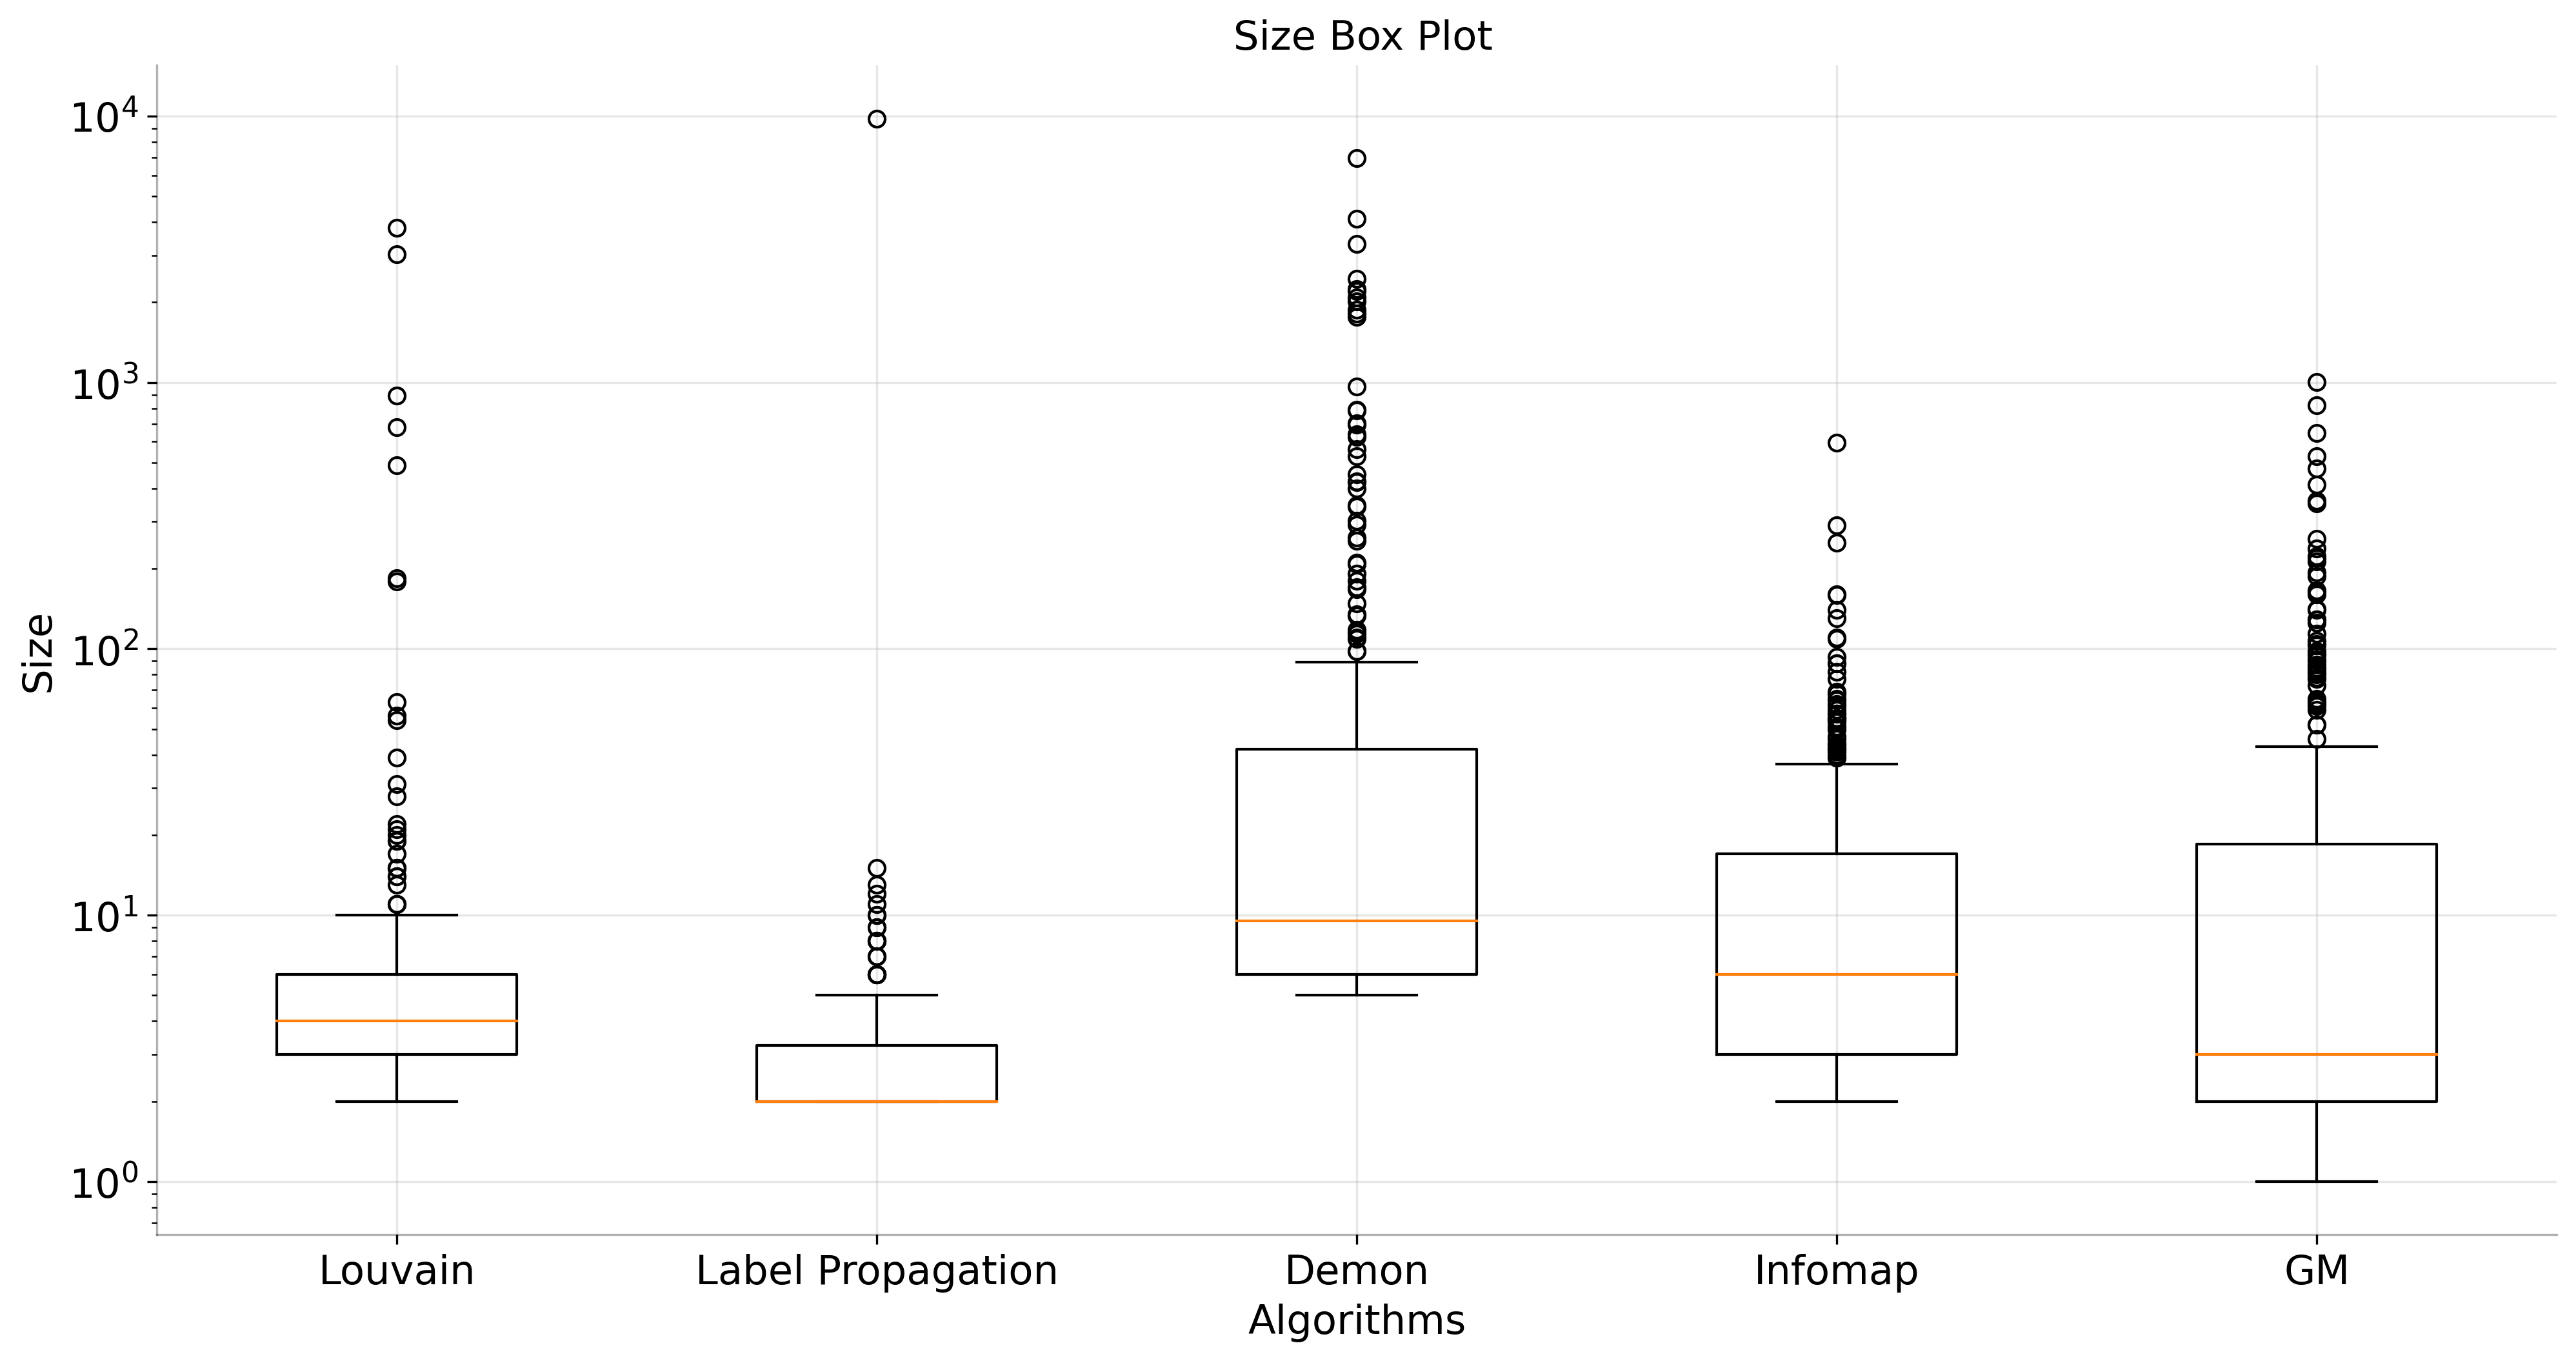

In [20]:
plot_list = [ np.array(evaluation.size(G,louvain_coms, summary=False)), 
             np.array(evaluation.size(G,labelprop_coms, summary=False)),
             np.array(evaluation.size(G,demon_coms, summary=False)),
             np.array(evaluation.size(G,infomap_coms, summary=False)),
             np.array(evaluation.size(G,GM_coms, summary=False))]

labels = ["Louvain", "Label Propagation", "Demon", "Infomap", "GM"]

fig = plt.figure(figsize=(16,8), dpi= 300)
ax = fig.add_subplot(111)
plt.boxplot(plot_list,labels=labels)
#plt.boxplot(x)

fontsize = 15

#plt.yticks(ticks=y_list, labels=y_list, fontsize=fontsize, alpha=.7)
plt.yticks(fontsize=fontsize, alpha=1)
plt.xticks(fontsize=fontsize, alpha=1)
plt.xlabel('Algorithms', fontsize=fontsize)
plt.ylabel("Size", fontsize=fontsize)
plt.title(" Size Box Plot", fontsize=fontsize)
#plt.title(name + " in 24 hours", fontsize=fontsize)
plt.grid(axis='both', alpha=.3)
plt.yscale("log")



# Remove borders
plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.3)   
plt.show()

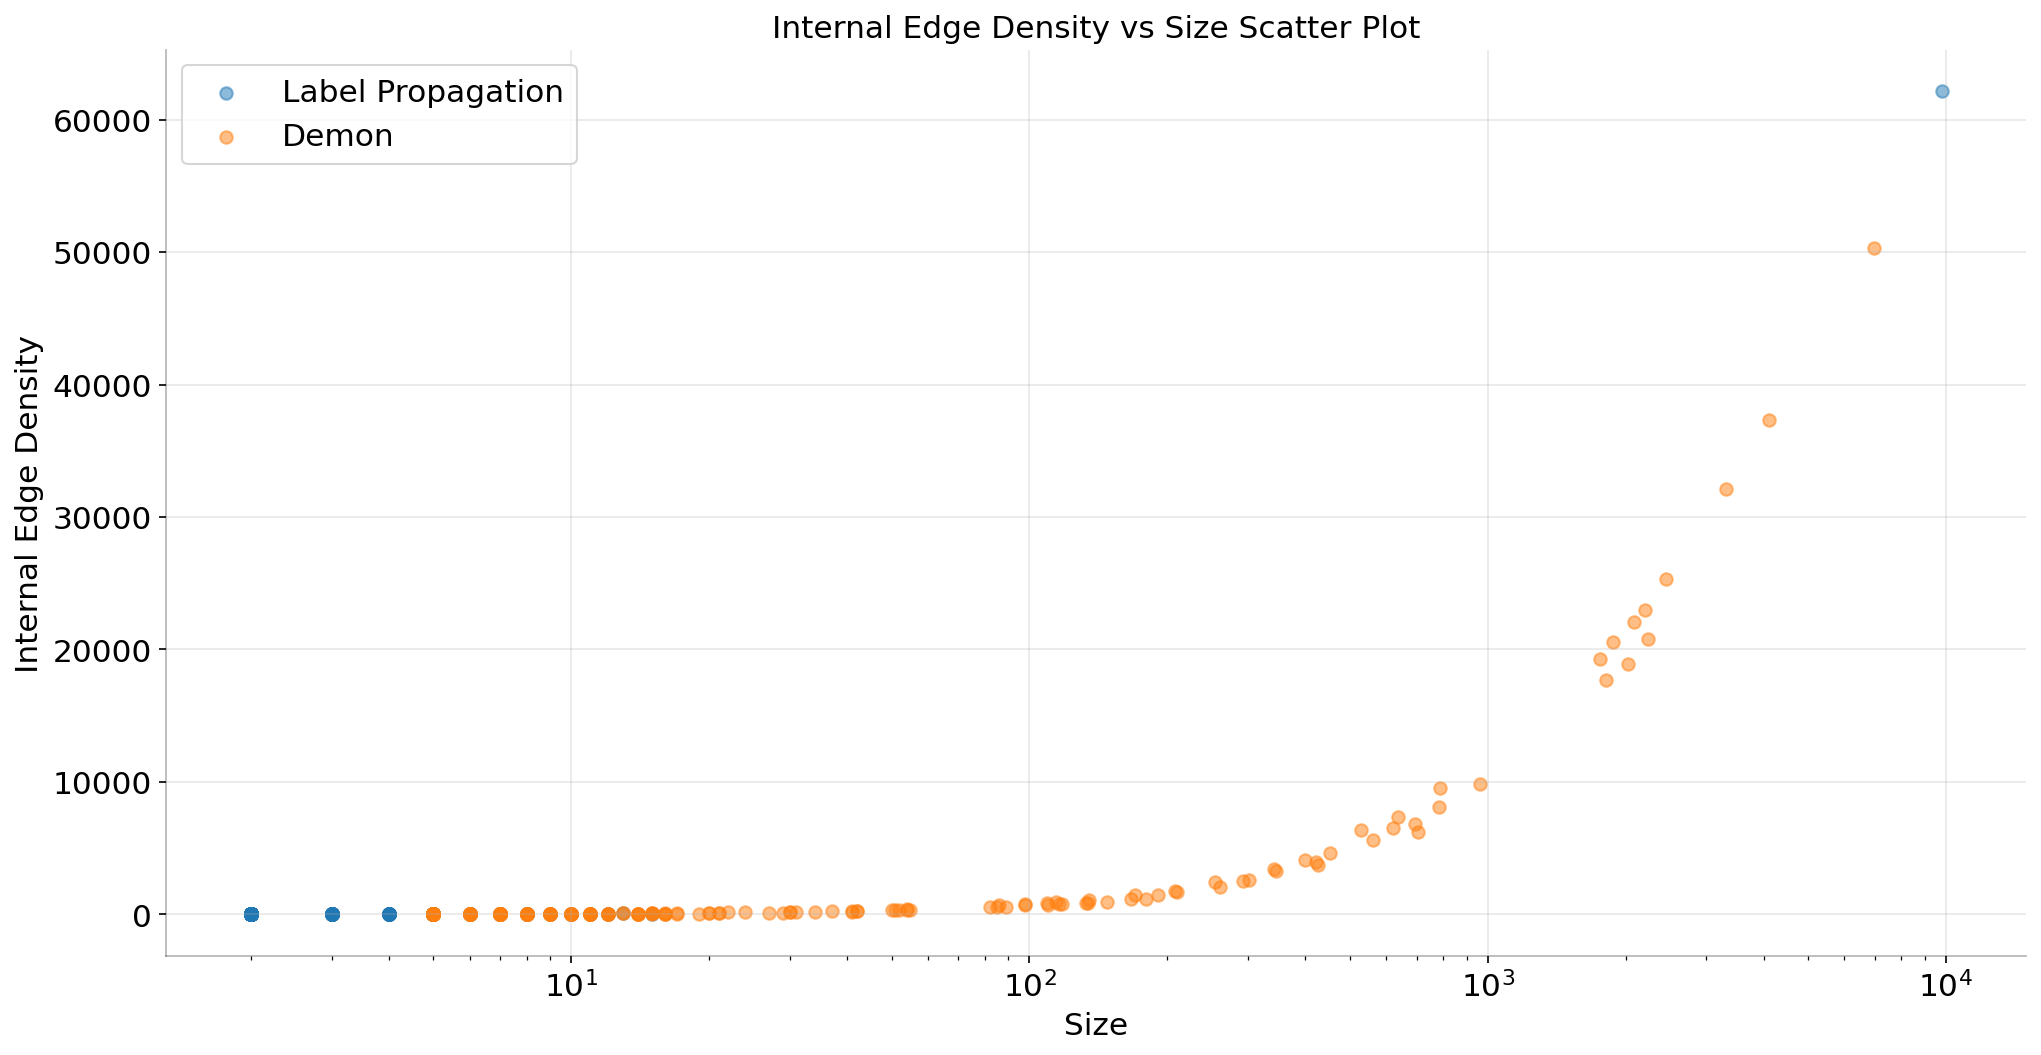

In [21]:
edge_density_ = [(np.array(evaluation.size(G,labelprop_coms, summary=False)), 
                               np.array(evaluation.edges_inside(G,labelprop_coms, summary=False)),
                               "Label Propagation"),
                               (np.array(evaluation.size(G,demon_coms, summary=False)), 
                                np.array(evaluation.edges_inside(G,demon_coms, summary=False)),
                                "Demon")]
scatter_plot(edge_density_, "Internal Edge Density vs Size")

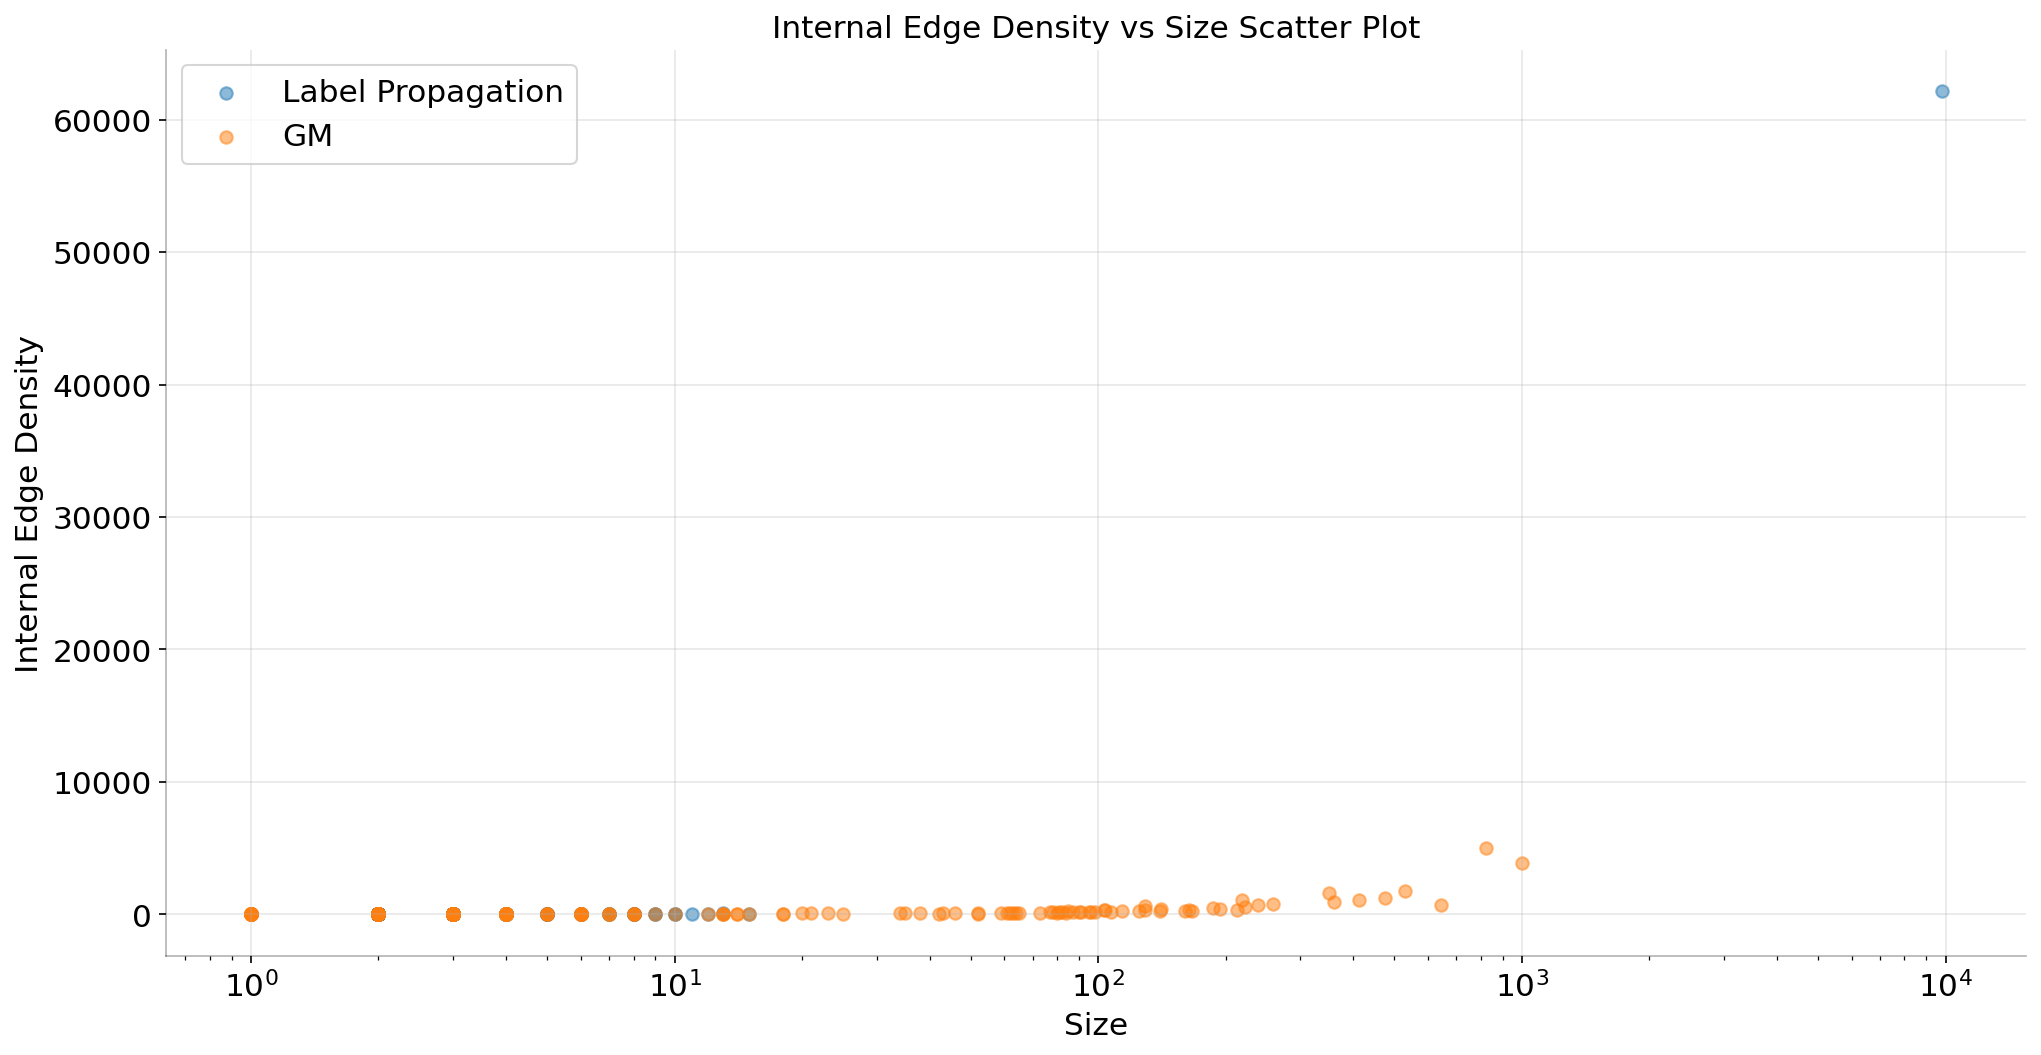

In [22]:
edge_density_ = [(np.array(evaluation.size(G,labelprop_coms, summary=False)), 
                               np.array(evaluation.edges_inside(G,labelprop_coms, summary=False)),
                               "Label Propagation"),
                               (np.array(evaluation.size(G,GM_coms, summary=False)), 
                                np.array(evaluation.edges_inside(G,GM_coms, summary=False)),
                                "GM")]
scatter_plot(edge_density_, "Internal Edge Density vs Size")

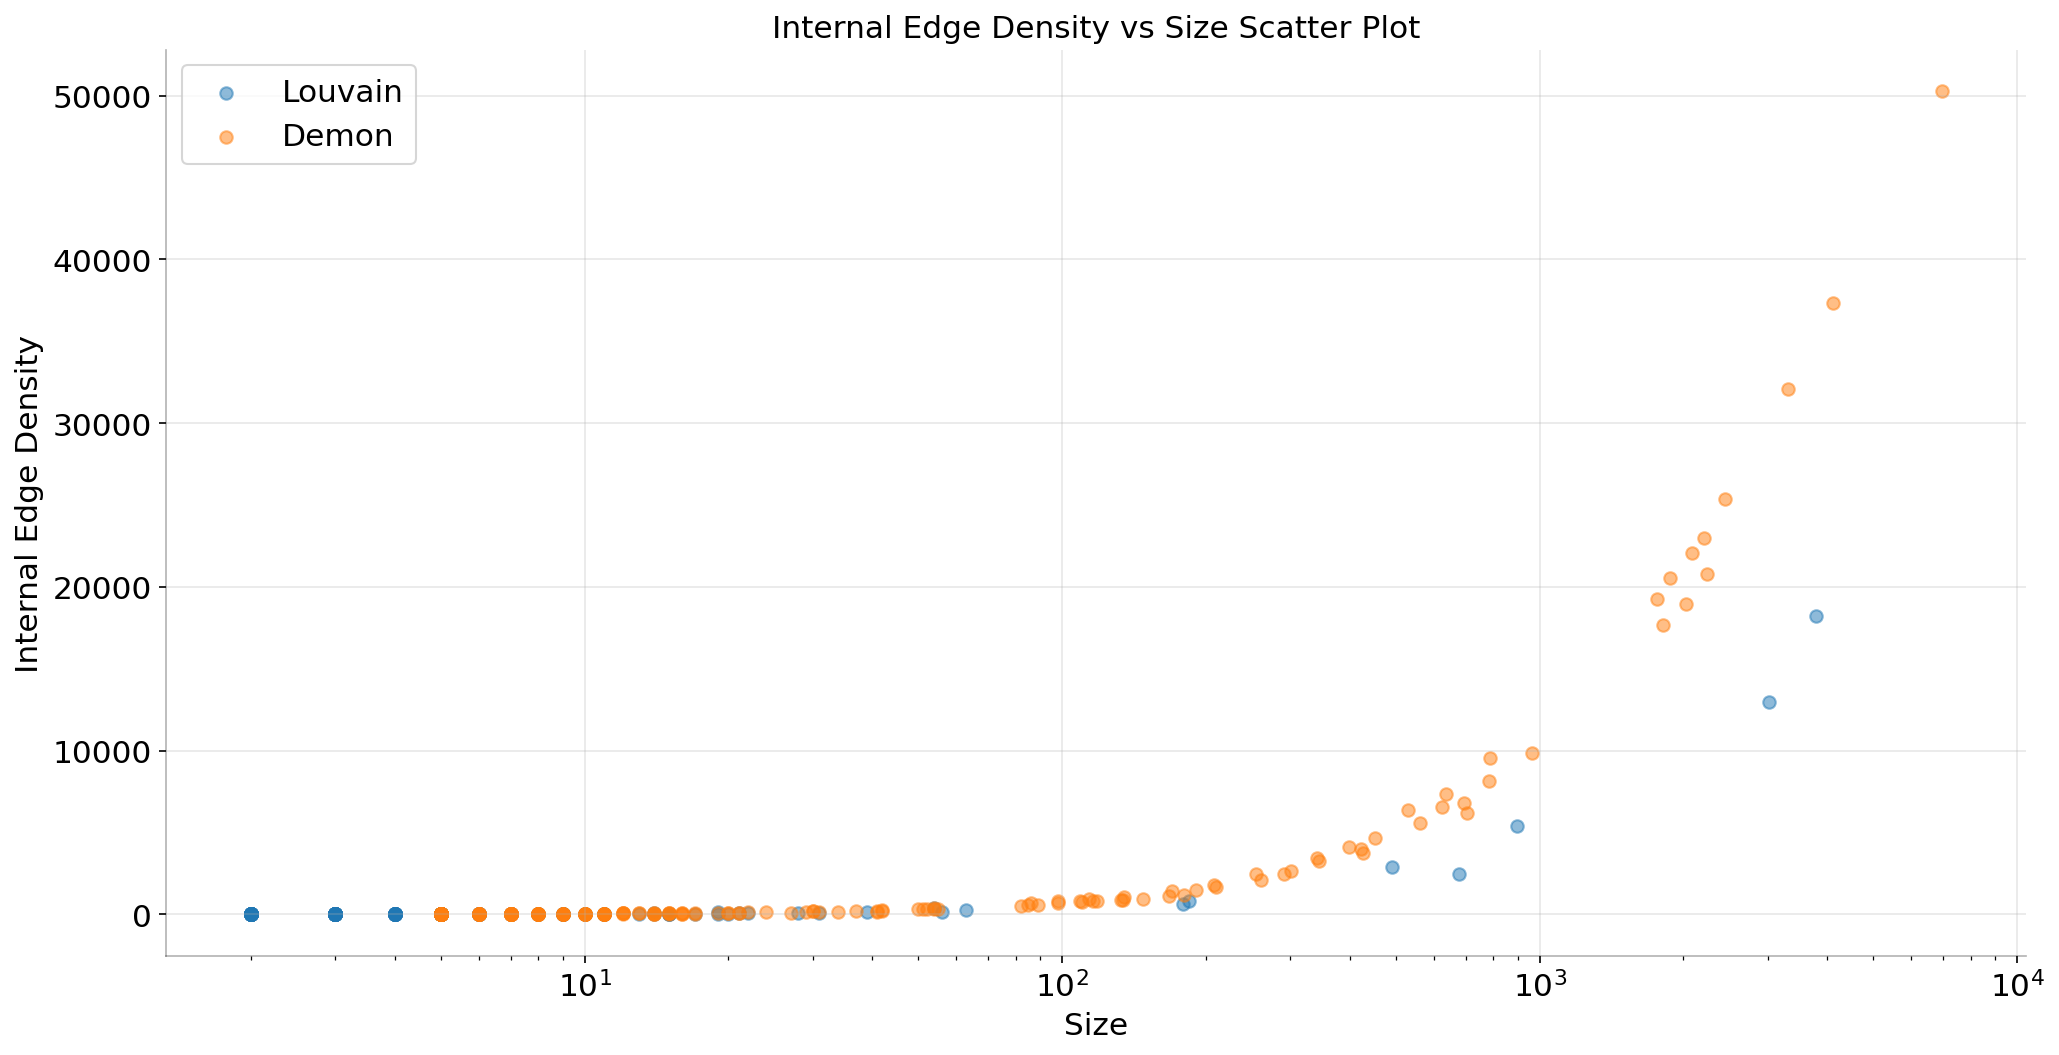

In [23]:
edge_density_= [(np.array(evaluation.size(G,louvain_coms, summary=False)), 
                               np.array(evaluation.edges_inside(G,louvain_coms, summary=False)),
                               "Louvain"),
                               (np.array(evaluation.size(G,demon_coms, summary=False)), 
                                np.array(evaluation.edges_inside(G,demon_coms, summary=False)),
                                "Demon")]
scatter_plot(edge_density_, "Internal Edge Density vs Size")

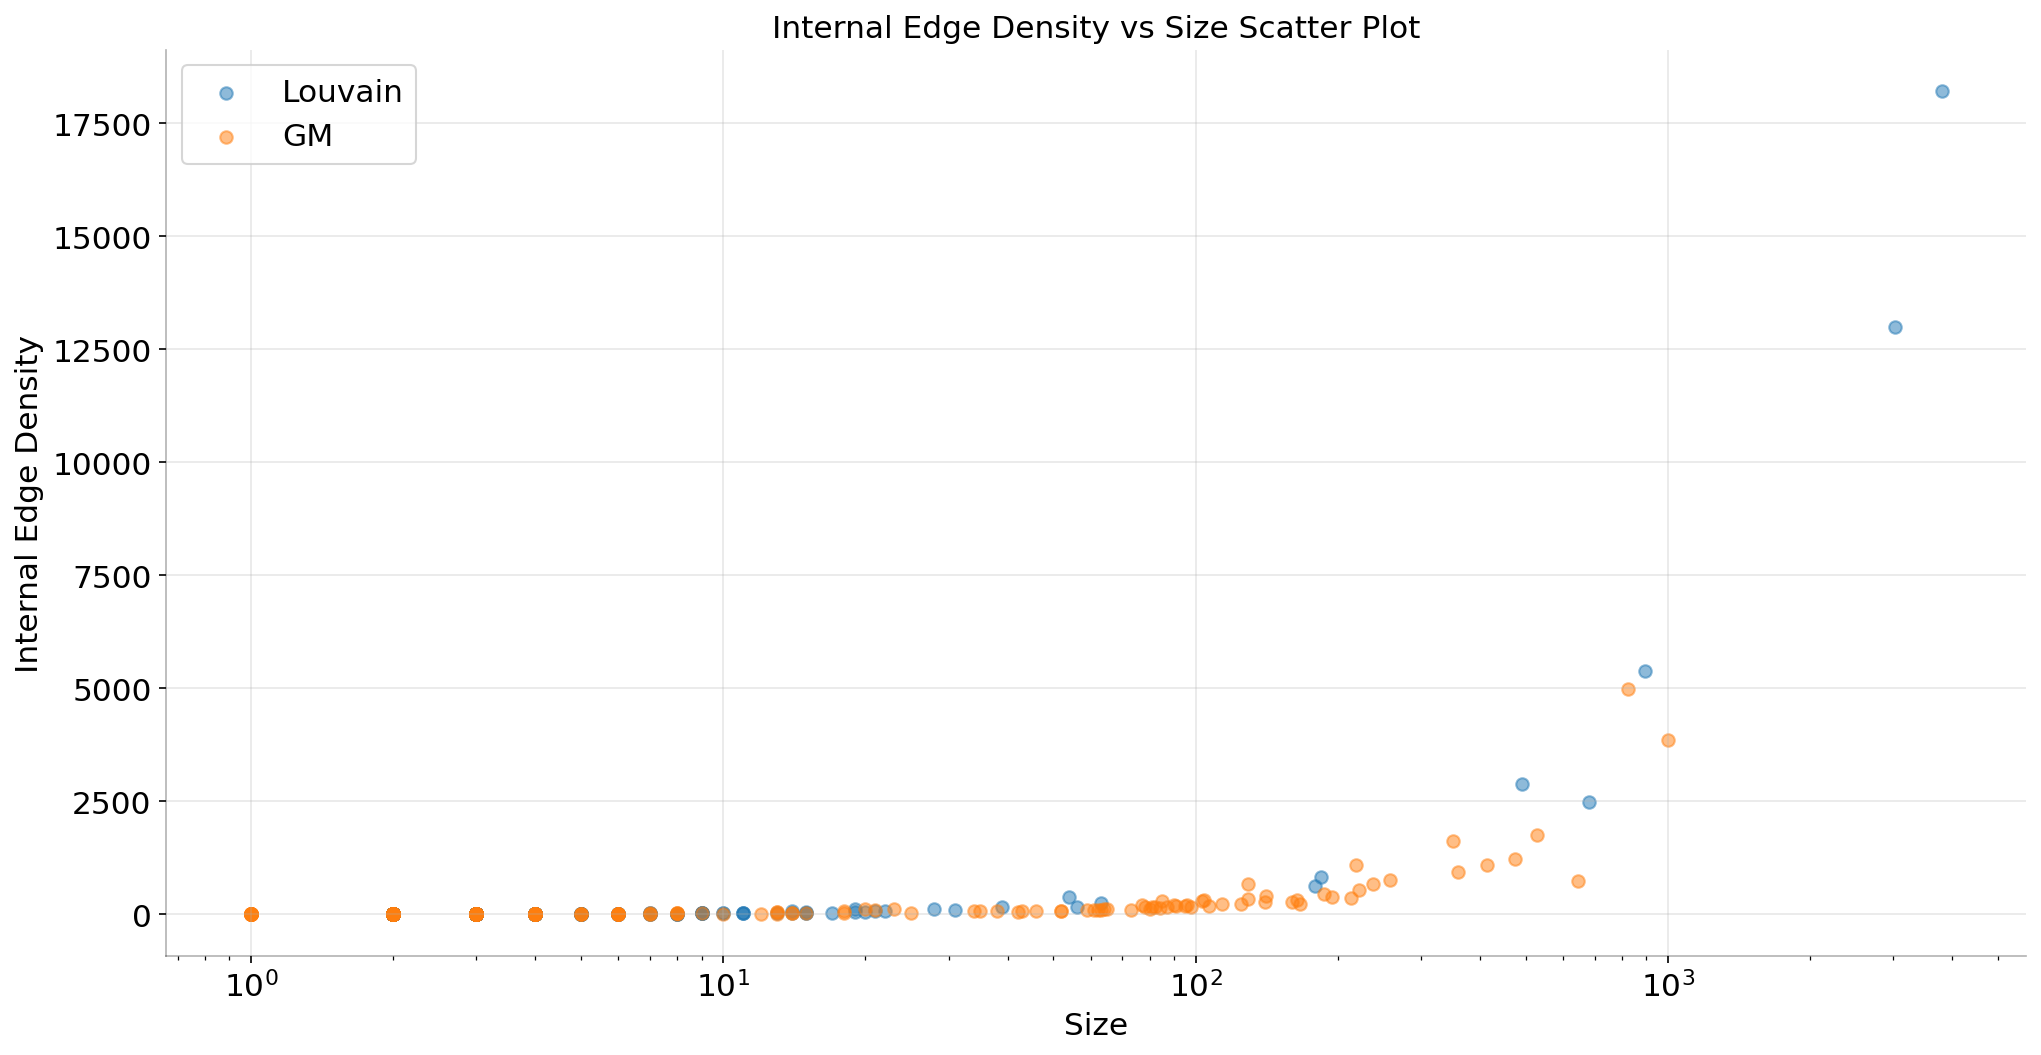

In [24]:
edge_density_= [(np.array(evaluation.size(G,louvain_coms, summary=False)), 
                               np.array(evaluation.edges_inside(G,louvain_coms, summary=False)),
                               "Louvain"),
                               (np.array(evaluation.size(G,GM_coms, summary=False)), 
                                np.array(evaluation.edges_inside(G,GM_coms, summary=False)),
                                "GM")]
scatter_plot(edge_density_, "Internal Edge Density vs Size")

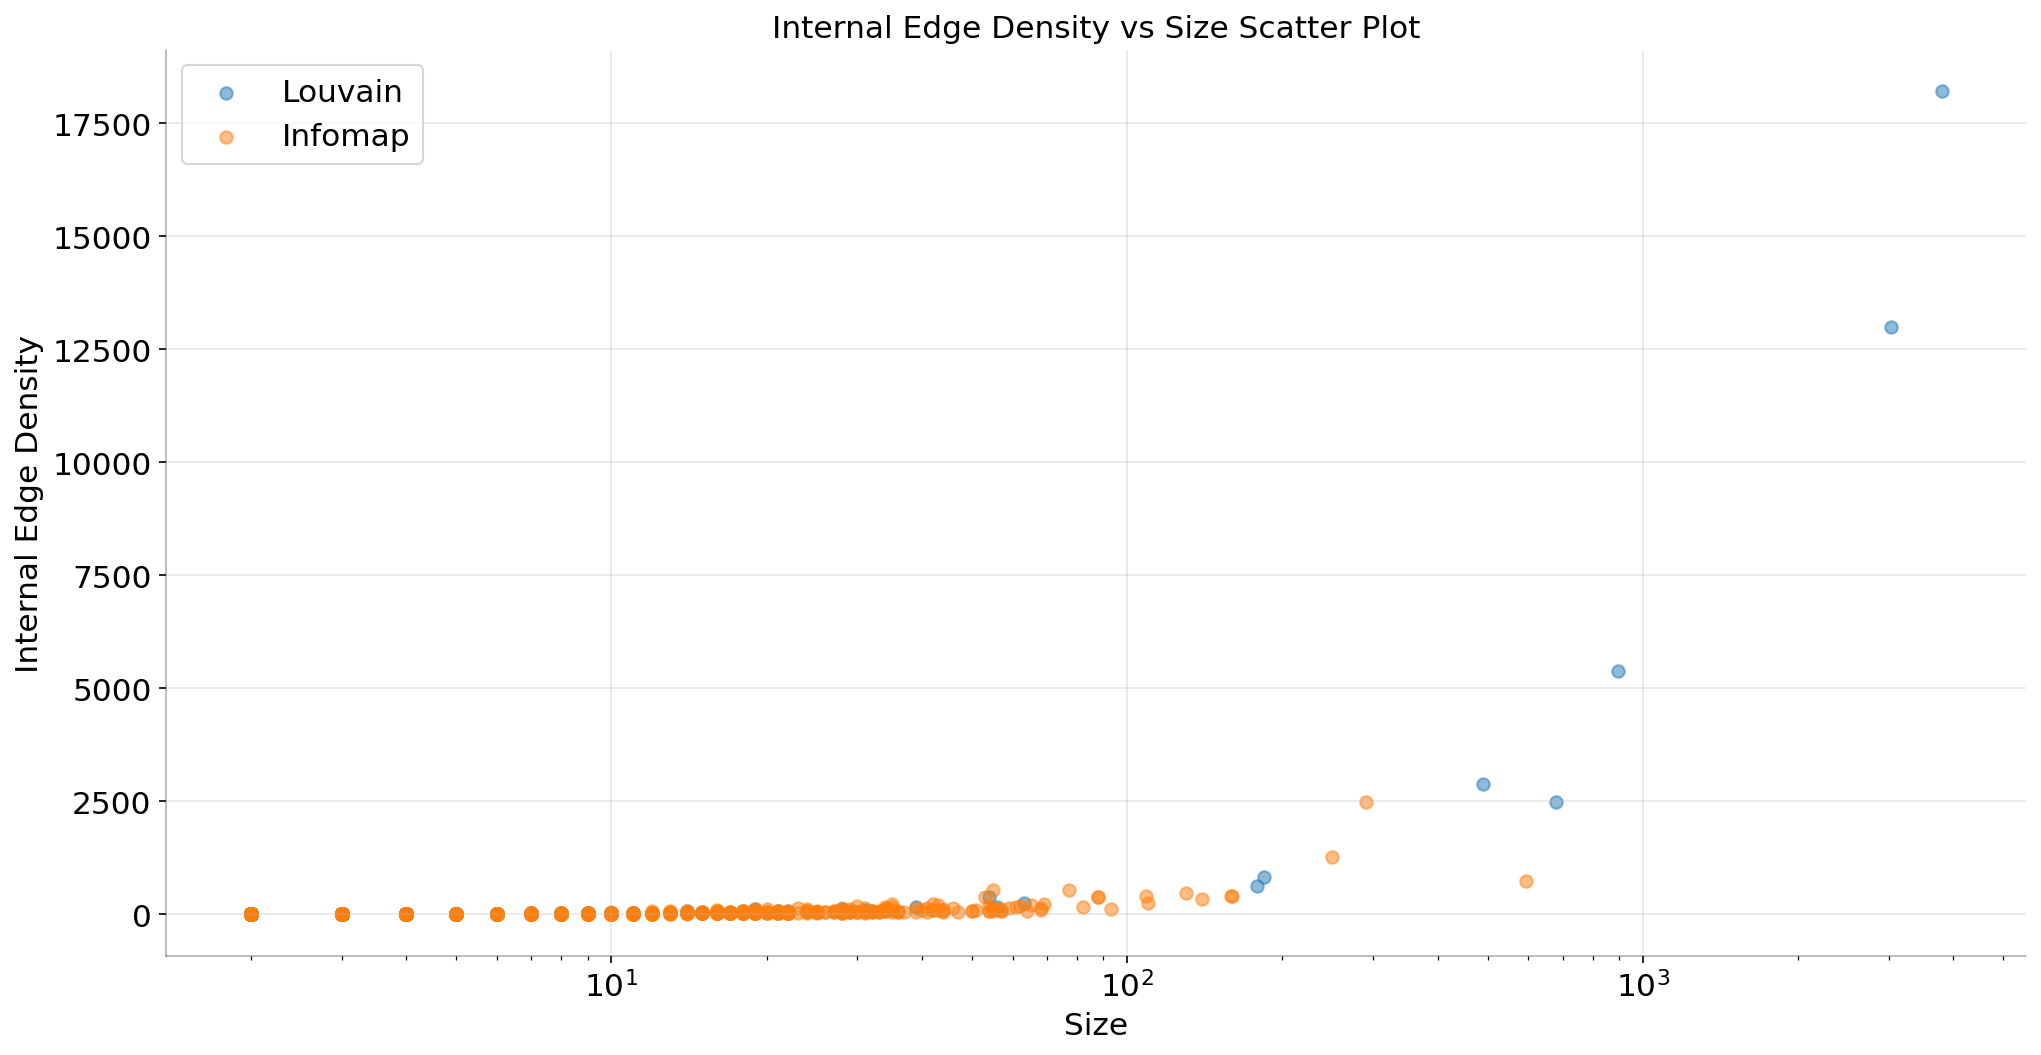

In [25]:
edge_density_= [(np.array(evaluation.size(G,louvain_coms, summary=False)), 
                               np.array(evaluation.edges_inside(G,louvain_coms, summary=False)),
                               "Louvain"),
                               (np.array(evaluation.size(G,infomap_coms, summary=False)), 
                                np.array(evaluation.edges_inside(G,infomap_coms, summary=False)),
                                "Infomap")]
scatter_plot(edge_density_, "Internal Edge Density vs Size")

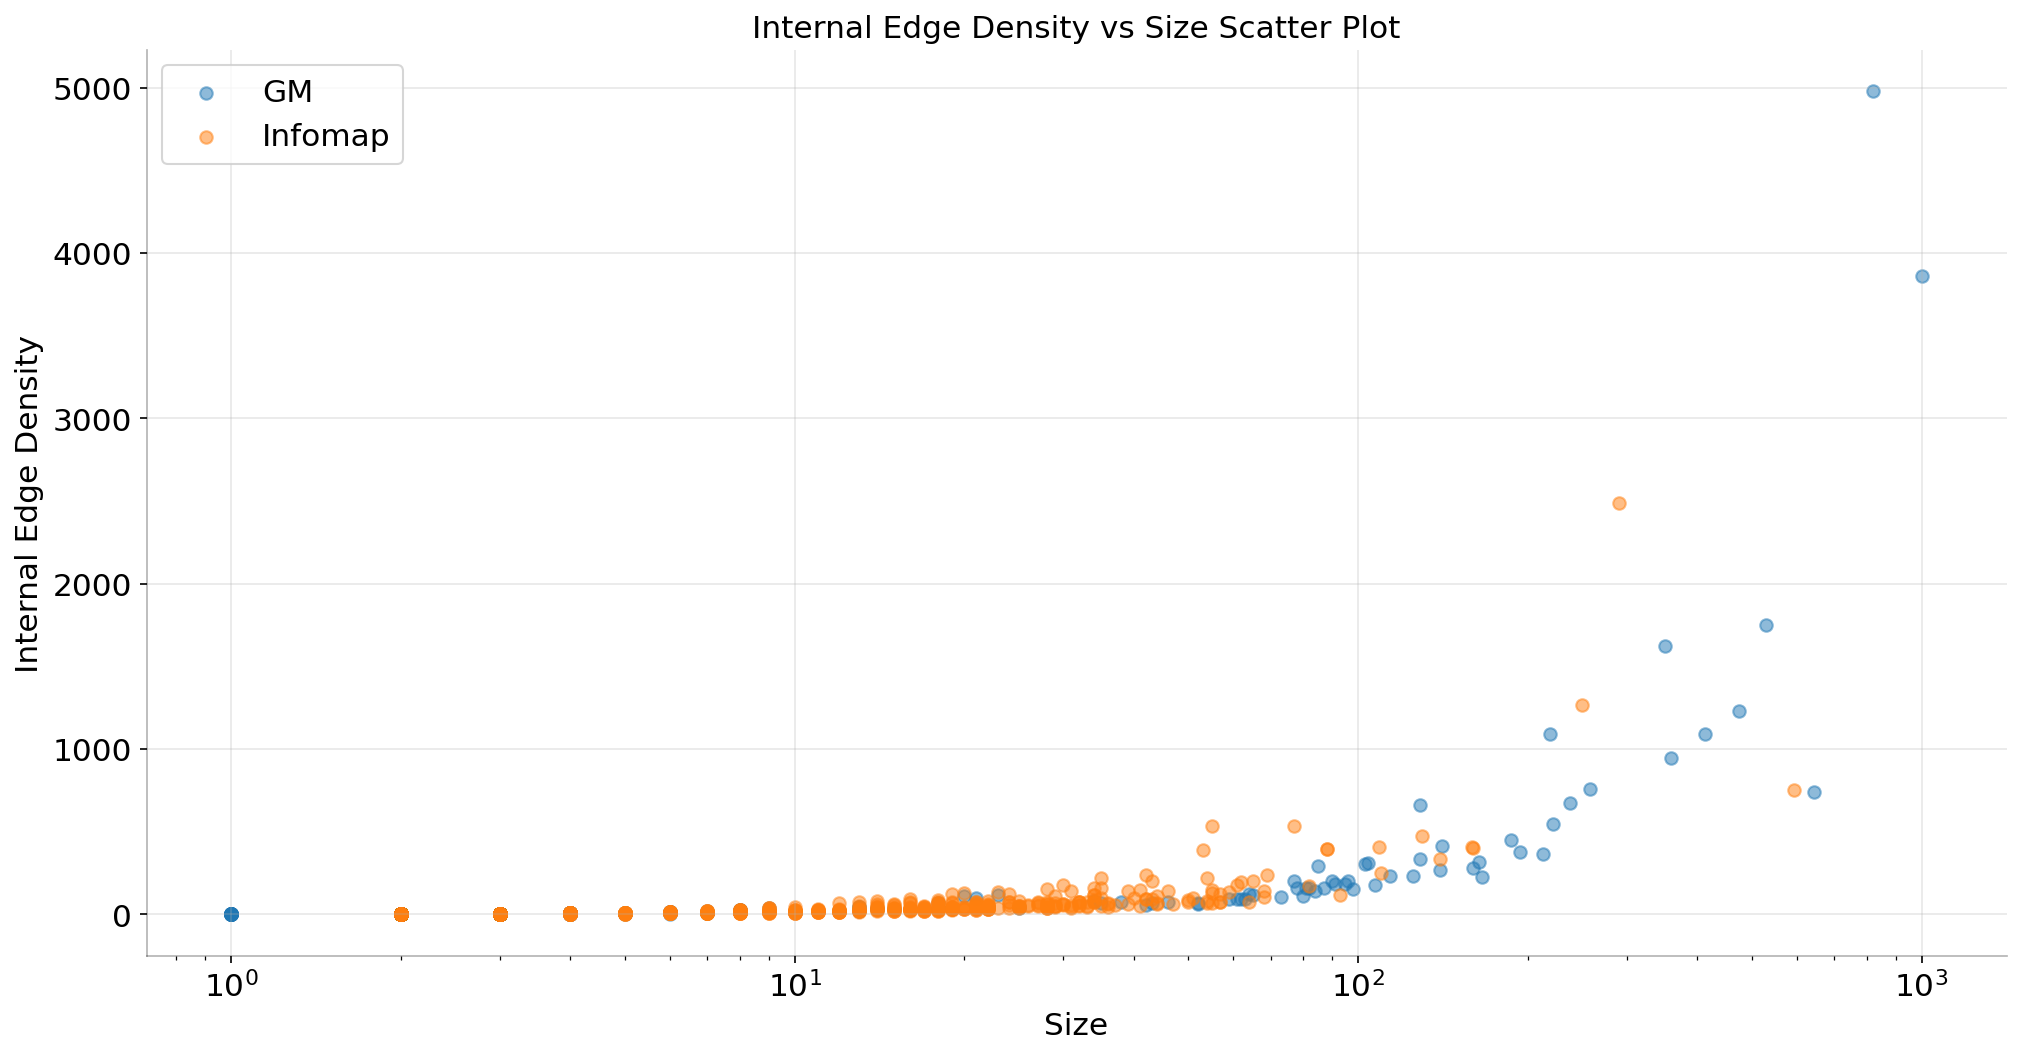

In [26]:
edge_density_= [(np.array(evaluation.size(G,GM_coms, summary=False)), 
                               np.array(evaluation.edges_inside(G,GM_coms, summary=False)),
                               "GM"),
                               (np.array(evaluation.size(G,infomap_coms, summary=False)), 
                                np.array(evaluation.edges_inside(G,infomap_coms, summary=False)),
                                "Infomap")]
scatter_plot(edge_density_, "Internal Edge Density vs Size")

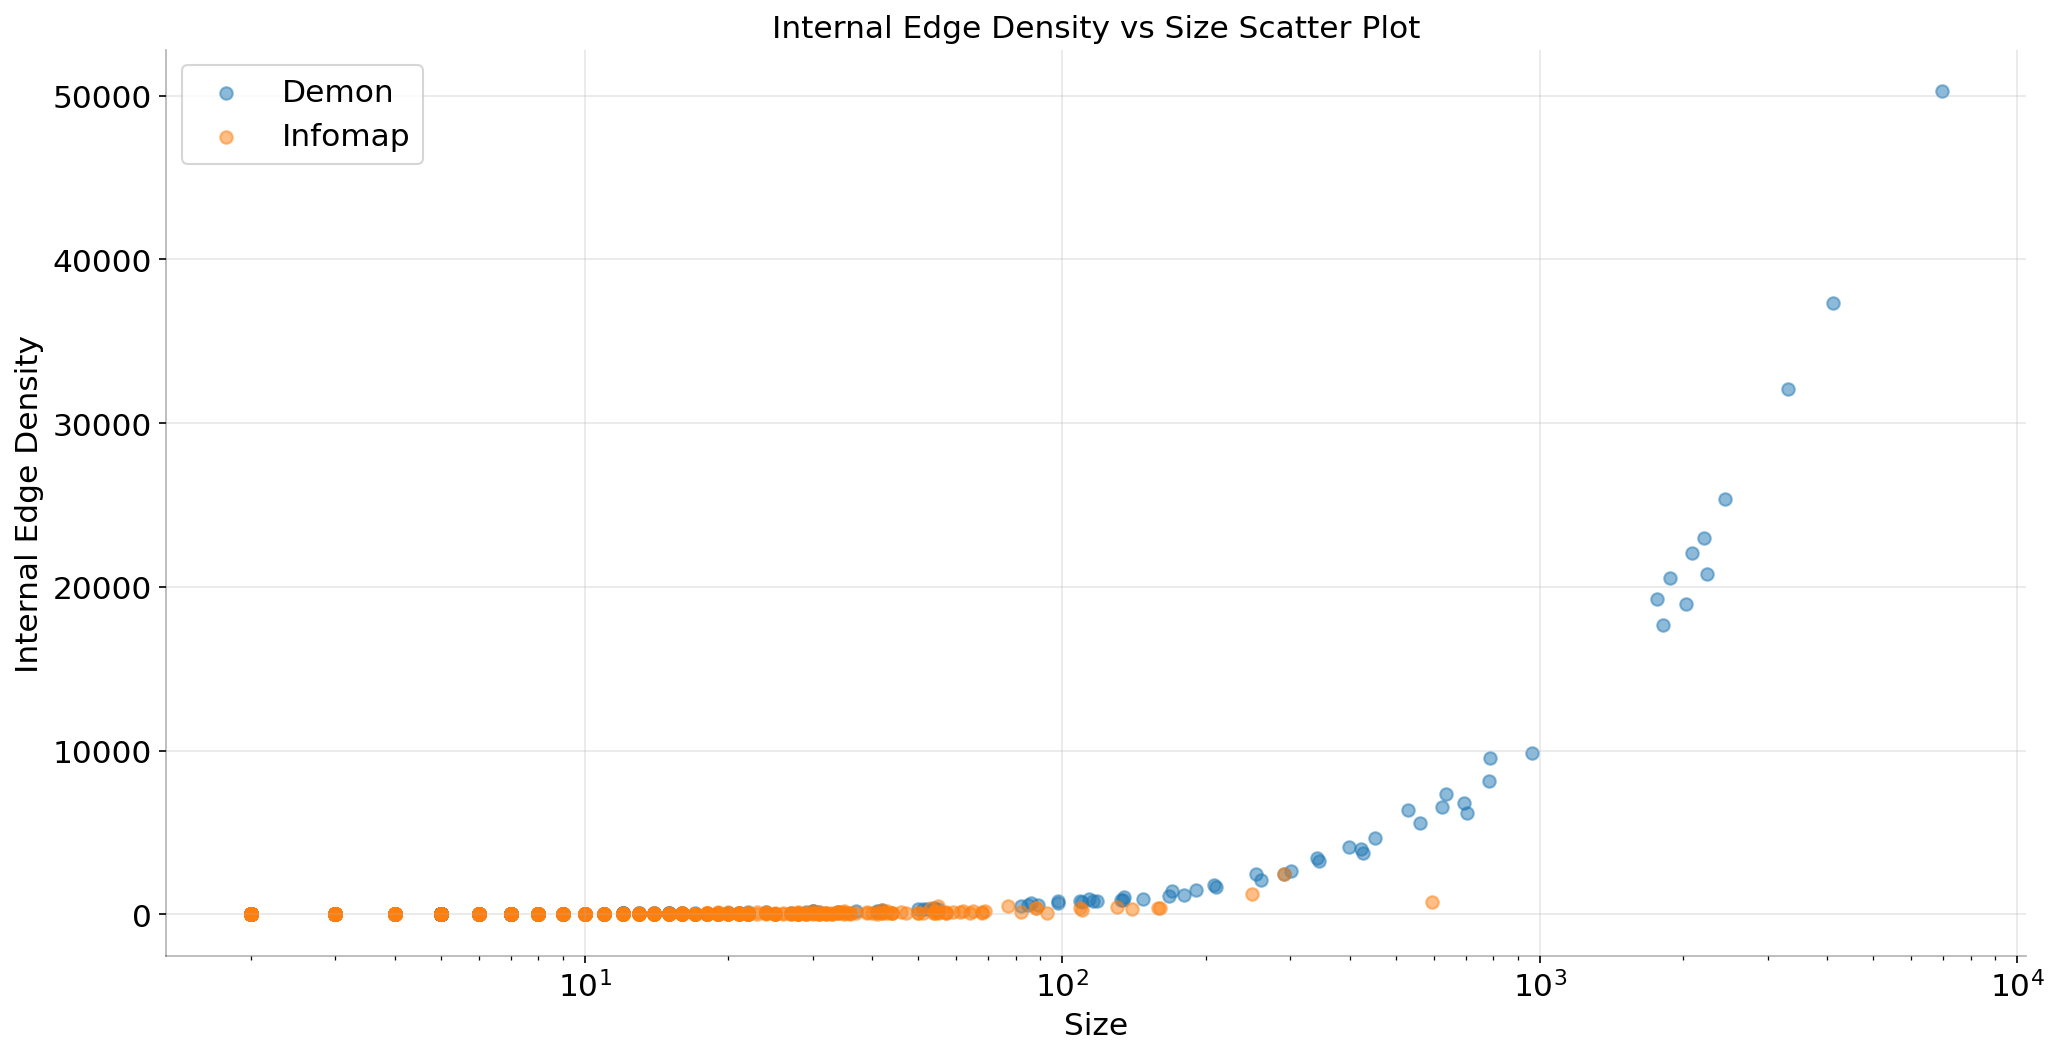

In [27]:
edge_density_= [(np.array(evaluation.size(G,demon_coms, summary=False)), 
                               np.array(evaluation.edges_inside(G,demon_coms, summary=False)),
                               "Demon"),
                               (np.array(evaluation.size(G,infomap_coms, summary=False)), 
                                np.array(evaluation.edges_inside(G,infomap_coms, summary=False)),
                                "Infomap")]
scatter_plot(edge_density_, "Internal Edge Density vs Size")

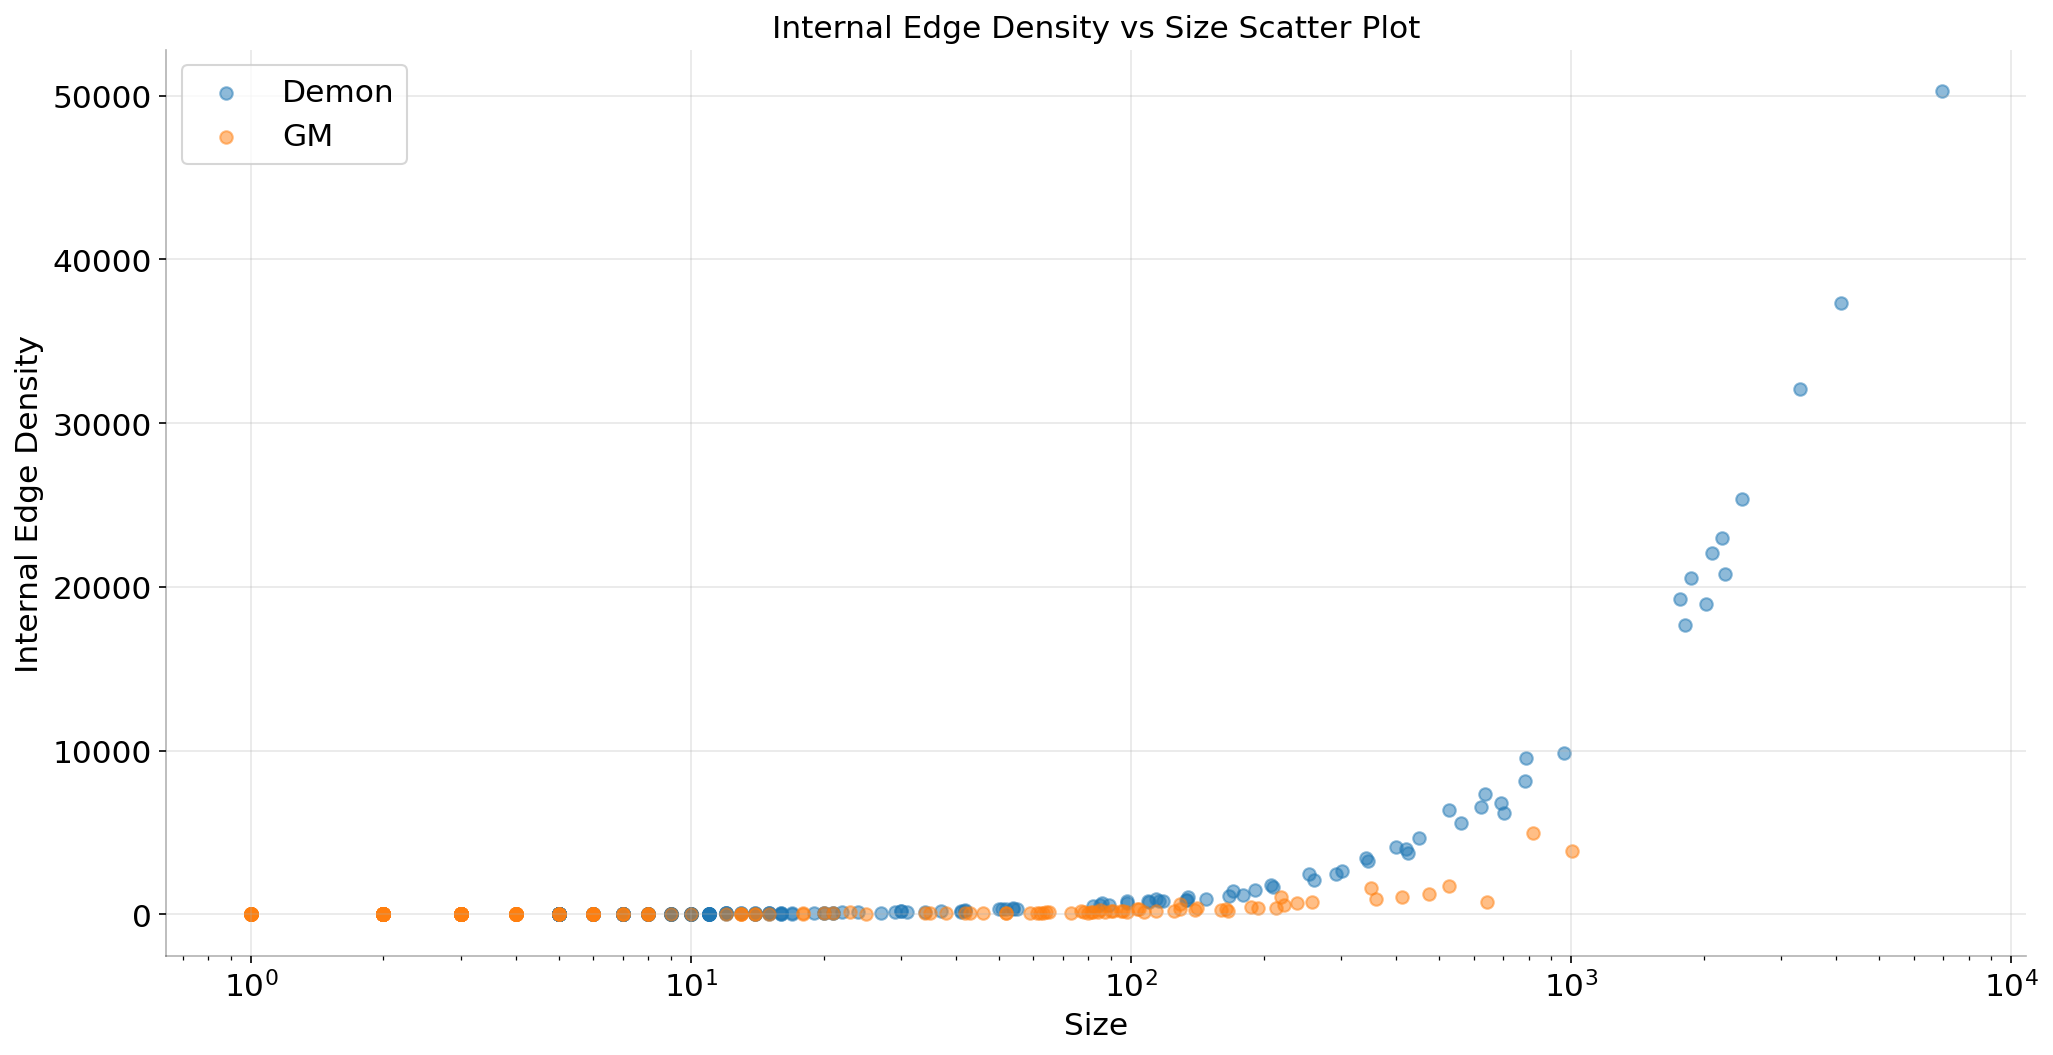

In [28]:
edge_density_= [(np.array(evaluation.size(G,demon_coms, summary=False)), 
                               np.array(evaluation.edges_inside(G,demon_coms, summary=False)),
                               "Demon"),
                               (np.array(evaluation.size(G,GM_coms, summary=False)), 
                                np.array(evaluation.edges_inside(G,GM_coms, summary=False)),
                                "GM")]
scatter_plot(edge_density_, "Internal Edge Density vs Size")

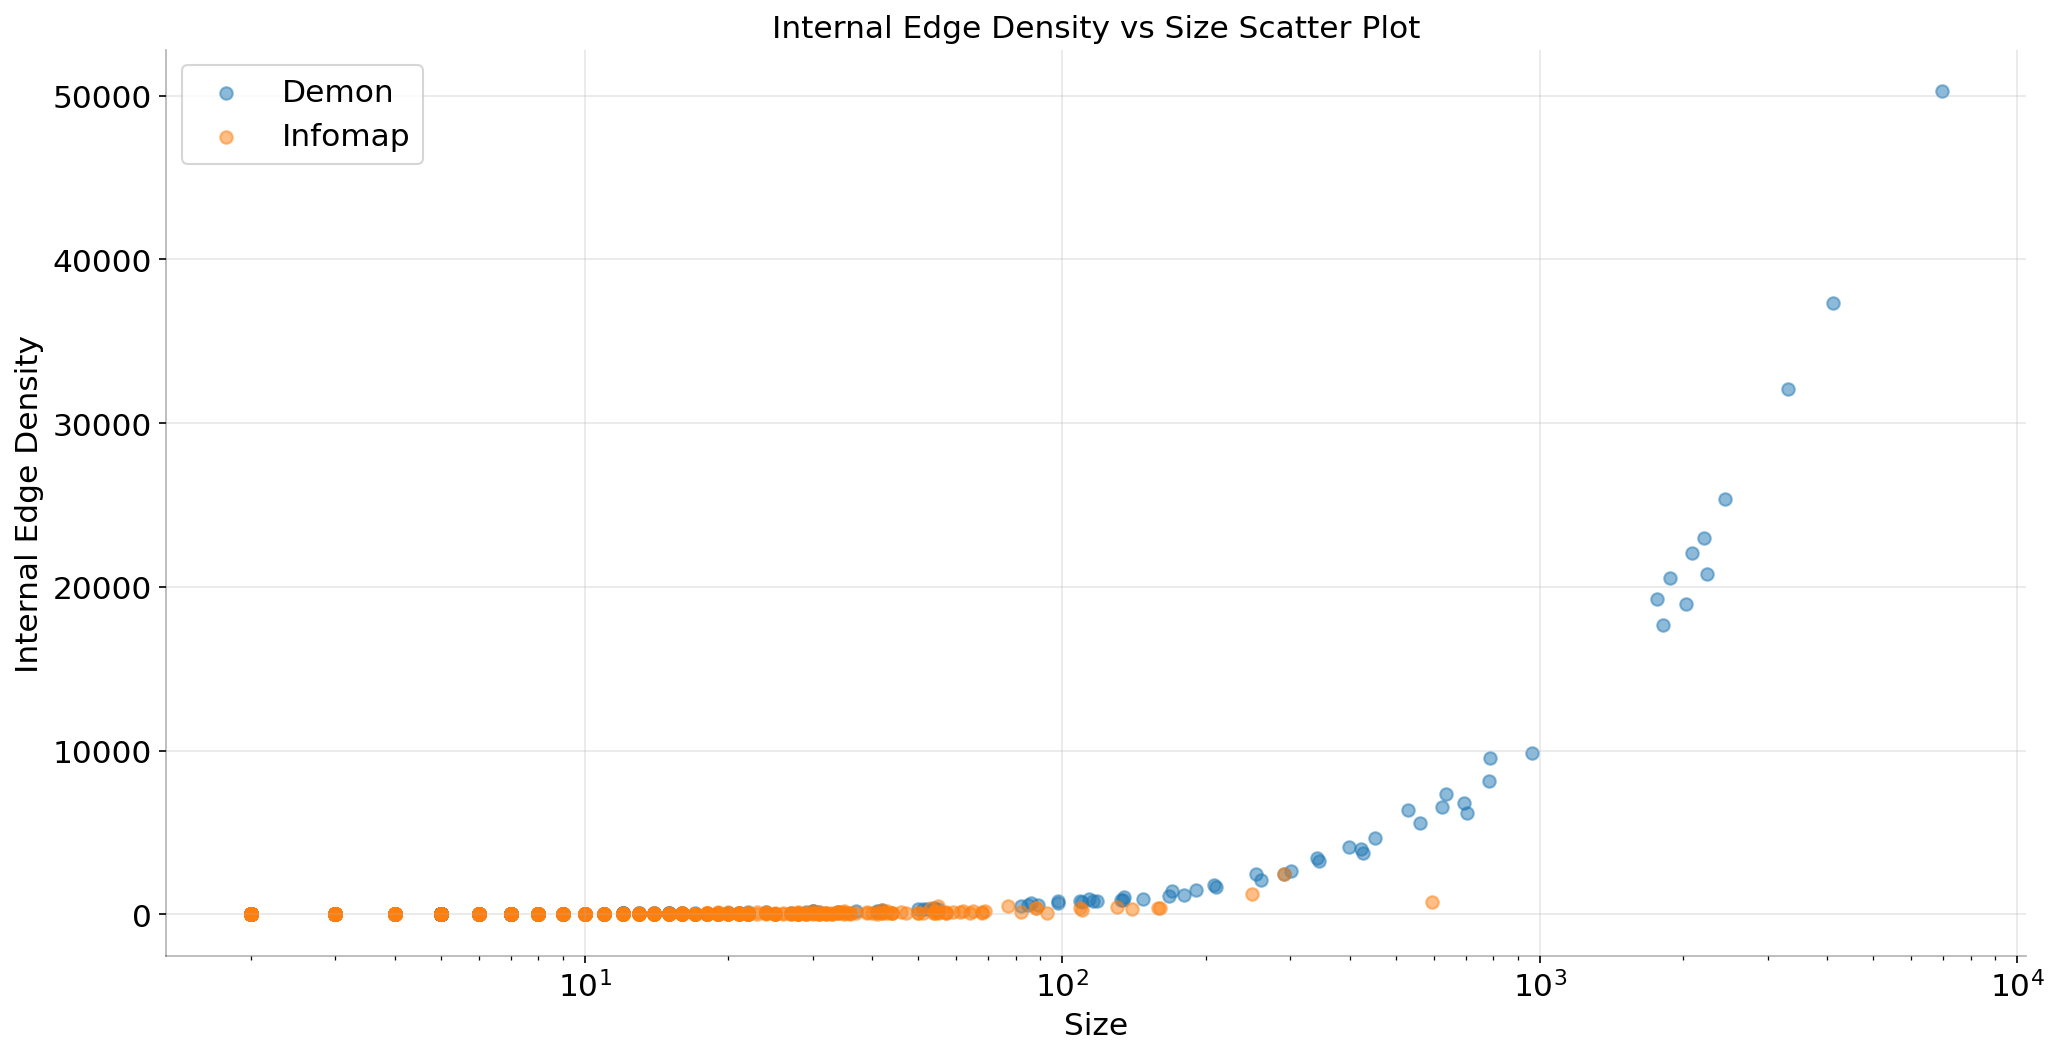

In [29]:
edge_density_= [(np.array(evaluation.size(G,demon_coms, summary=False)), 
                               np.array(evaluation.edges_inside(G,demon_coms, summary=False)),
                               "Demon"),
                               (np.array(evaluation.size(G,infomap_coms, summary=False)), 
                                np.array(evaluation.edges_inside(G,infomap_coms, summary=False)),
                                "Infomap")]
scatter_plot(edge_density_, "Internal Edge Density vs Size")

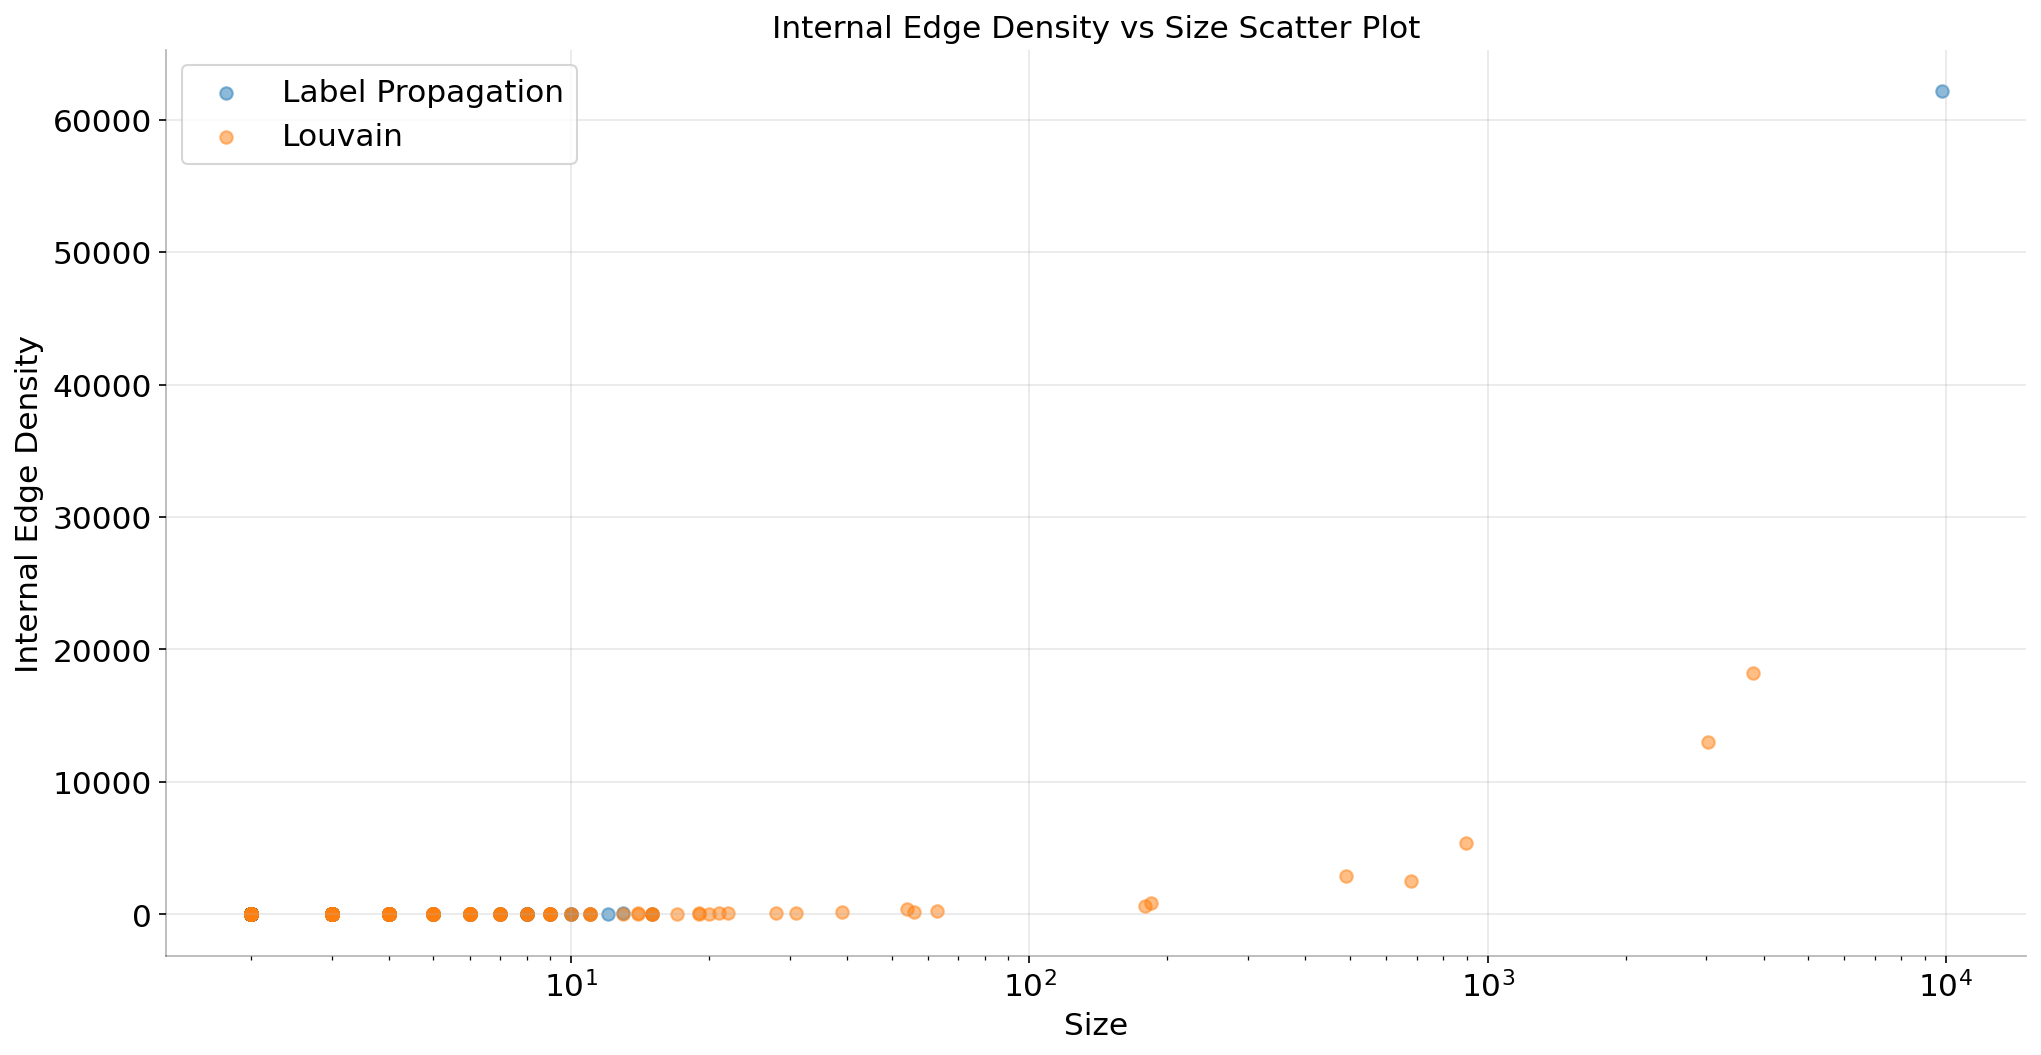

In [30]:
edge_density_ = [(np.array(evaluation.size(G,labelprop_coms, summary=False)), 
                               np.array(evaluation.edges_inside(G,labelprop_coms, summary=False)),
                               "Label Propagation"),
                               (np.array(evaluation.size(G,louvain_coms, summary=False)), 
                                np.array(evaluation.edges_inside(G,louvain_coms, summary=False)),
                                "Louvain")]
scatter_plot(edge_density_, "Internal Edge Density vs Size")

In [31]:
plot_list = [ np.array(evaluation.size(G,louvain_coms, summary=False)), 
             np.array(evaluation.size(G,labelprop_coms, summary=False)),
             np.array(evaluation.size(G,demon_coms, summary=False)),
             np.array(evaluation.size(G,infomap_coms, summary=False)),
             np.array(evaluation.size(G,GM_coms, summary=False))]

In [32]:
edge_density_all= [(np.array(evaluation.size(G,labelprop_coms, summary=False)), np.array(evaluation.edges_inside(G,labelprop_coms, summary=False)), "Label Propagation"),
                       (np.array(evaluation.size(G,louvain_coms, summary=False)), np.array(evaluation.edges_inside(G,louvain_coms, summary=False)), "Louvain"),
                      (np.array(evaluation.size(G,demon_coms, summary=False)), np.array(evaluation.edges_inside(G,demon_coms, summary=False)), "Demon"),
                       (np.array(evaluation.size(G,infomap_coms, summary=False)), np.array(evaluation.edges_inside(G,infomap_coms, summary=False)), "Infomap"),
                      (np.array(evaluation.size(G,GM_coms, summary=False)), np.array(evaluation.edges_inside(G,GM_coms, summary=False)), "GM"),]

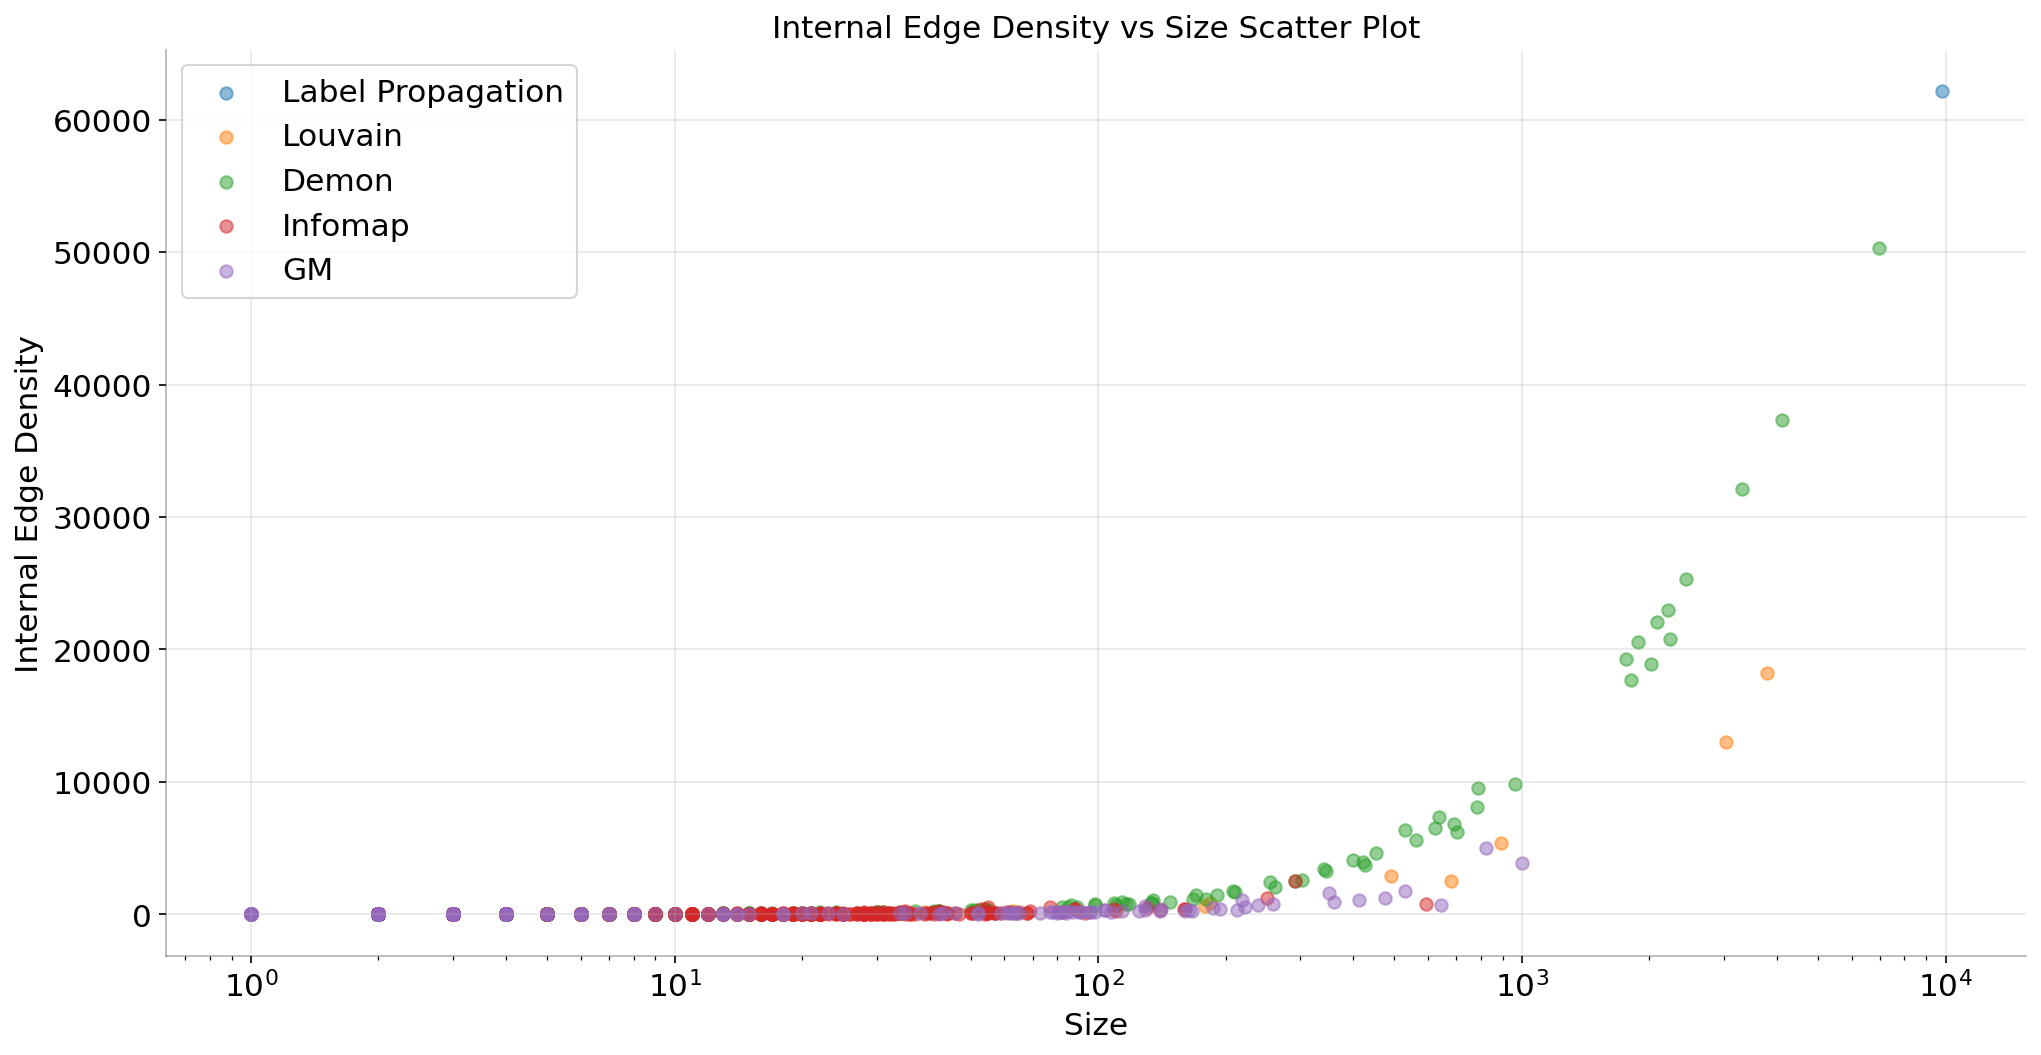

In [33]:
scatter_plot(edge_density_all, "Internal Edge Density vs Size")

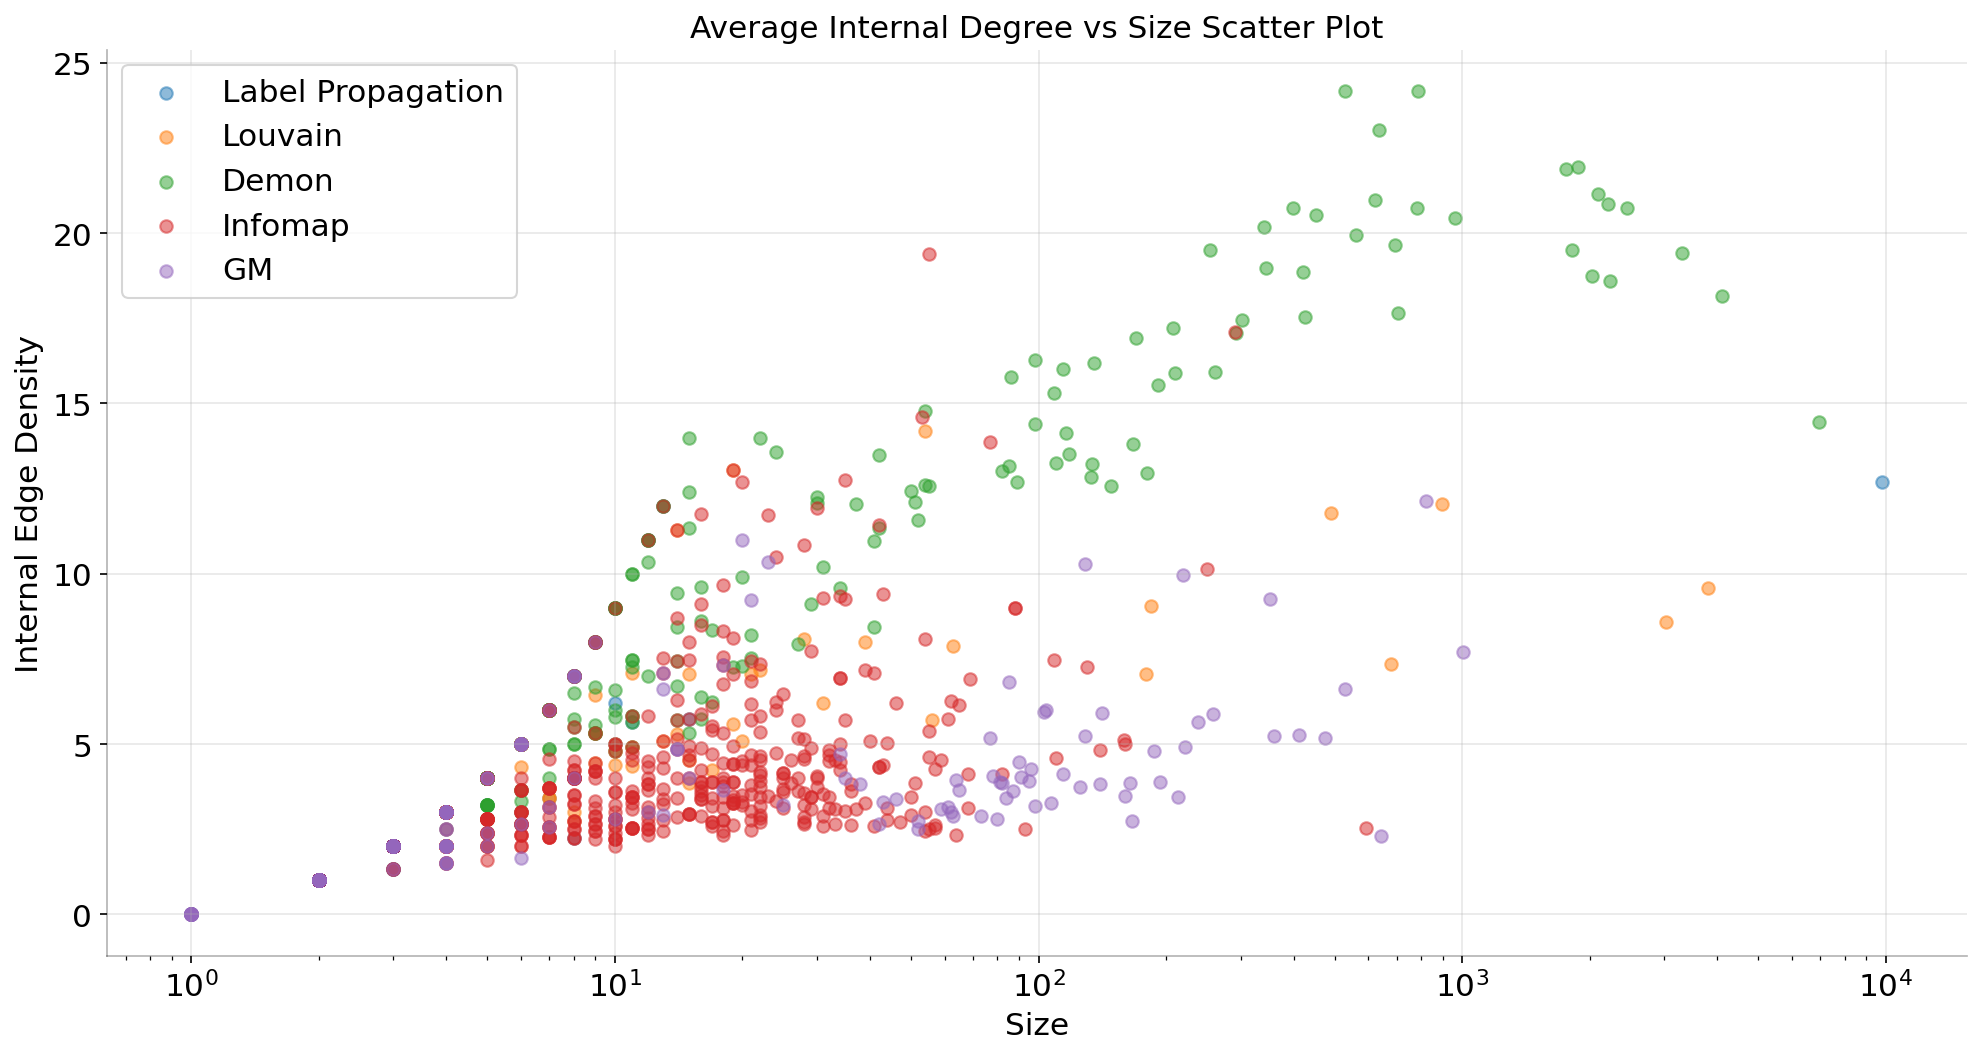

In [34]:
avg_deg_all= [(np.array(evaluation.size(G,labelprop_coms, summary=False)), np.array(evaluation.average_internal_degree(G,labelprop_coms, summary=False)), "Label Propagation"),
                       (np.array(evaluation.size(G,louvain_coms, summary=False)), np.array(evaluation.average_internal_degree(G,louvain_coms, summary=False)), "Louvain"),
                      (np.array(evaluation.size(G,demon_coms, summary=False)), np.array(evaluation.average_internal_degree(G,demon_coms, summary=False)), "Demon"),
                       (np.array(evaluation.size(G,infomap_coms, summary=False)), np.array(evaluation.average_internal_degree(G,infomap_coms, summary=False)), "Infomap"),
                      (np.array(evaluation.size(G,GM_coms, summary=False)), np.array(evaluation.average_internal_degree(G,GM_coms, summary=False)), "GM"),]
scatter_plot(avg_deg_all, "Average Internal Degree vs Size")

3) Comparison NMI, NF1

In [35]:
#Non di Demon (e in caso di Kclique se si riesce a fare) perchè non copre tutto il dataset ed è overlapping
def comparison_NMI(coms1, coms2, name):
    print(f"{name}: ",evaluation.normalized_mutual_information(coms1, coms2))  
    print("********")

In [36]:
def comparison_NF1(coms1, coms2, name):
    print(f"{name}: ",evaluation.nf1(coms1, coms2))
    coms1_tuple = [tuple(x) for x in coms1.communities]
    coms2_tuple = [tuple(x) for x in coms2.communities]
    nf = NF1(coms1_tuple,coms2_tuple)
    results = nf.summary()
    print(results['scores'])
    print(results['details'])
    nf.plot(title=f'{name}')
    print("*********")

NMI

In [37]:
comparison_NMI(louvain_coms, labelprop_coms, "Louvain vs Label")
comparison_NMI(louvain_coms, infomap_coms, "Louvain vs Infomap")
comparison_NMI(louvain_coms, GM_coms, "Louvain vs GM")
comparison_NMI(infomap_coms, labelprop_coms, "Infomap vs Label")
comparison_NMI(infomap_coms, GM_coms, "Infomap vs GM")
comparison_NMI(labelprop_coms, GM_coms, "Label vs GM")

Louvain vs Label:  MatchingResult(score=0.17540122709154976, std=None)
********
Louvain vs Infomap:  MatchingResult(score=0.45885892125234407, std=None)
********
Louvain vs GM:  MatchingResult(score=0.4547861589319915, std=None)
********
Infomap vs Label:  MatchingResult(score=0.12841703715592045, std=None)
********
Infomap vs GM:  MatchingResult(score=0.6495582209321794, std=None)
********
Label vs GM:  MatchingResult(score=0.12390754990767264, std=None)
********


NF1

Louvain vs Label Propagation:  MatchingResult(score=0.038381286629181034, std=None)
                               Value
Index                               
Ground Truth Communities  172.000000
Identified Communities    185.000000
Community Ratio             1.075581
Ground Truth Matched        0.354651
Node Coverage               1.000000
NF1                         0.038381
   F1 min  F1 max   F1 mean  F1 mode    F1 std
0     0.0     1.0  0.328216      0.0  0.460187


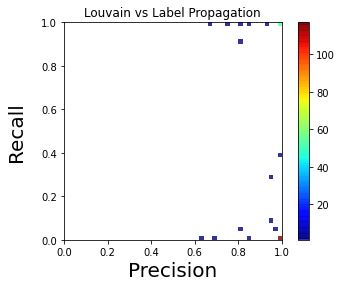

*********
Infomap vs Label:  MatchingResult(score=0.009355500550572689, std=None)
                               Value
Index                               
Ground Truth Communities  172.000000
Identified Communities    706.000000
Community Ratio             4.104651
Ground Truth Matched        0.546512
Node Coverage               1.000000
NF1                         0.009356
   F1 min  F1 max   F1 mean  F1 mode    F1 std
0     0.0     1.0  0.128571      0.0  0.325889


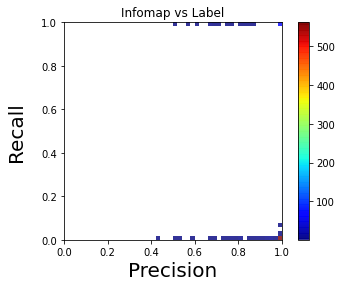

*********
Louvain vs Infomap:  MatchingResult(score=0.2344047163310619, std=None)
                               Value
Index                               
Ground Truth Communities  706.000000
Identified Communities    185.000000
Community Ratio             0.262040
Ground Truth Matched        0.263456
Node Coverage               1.000000
NF1                         0.234405
   F1 min  F1 max   F1 mean  F1 mode    F1 std
0    0.08     1.0  0.884946      1.0  0.243788


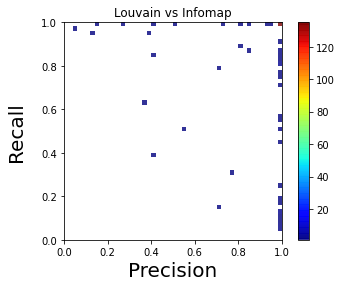

*********
Louvain vs Demon:  MatchingResult(score=0.0553165687426557, std=None)
                               Value
Index                               
Ground Truth Communities  230.000000
Identified Communities    185.000000
Community Ratio             0.804348
Ground Truth Matched        0.330435
Node Coverage               1.146255
NF1                         0.055317
   F1 min  F1 max  F1 mean  F1 mode    F1 std
0     0.0    0.97   0.4075      0.0  0.396195


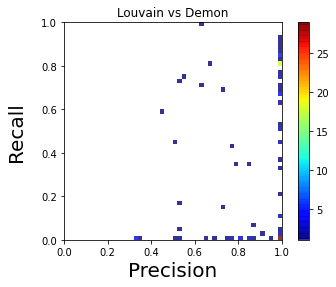

*********
Infomap vs Demon:  MatchingResult(score=0.01647189236576512, std=None)
                               Value
Index                               
Ground Truth Communities  230.000000
Identified Communities    706.000000
Community Ratio             3.069565
Ground Truth Matched        0.652174
Node Coverage               1.146255
NF1                         0.016472
   F1 min  F1 max   F1 mean  F1 mode    F1 std
0     0.0    0.96  0.118876      0.0  0.267244


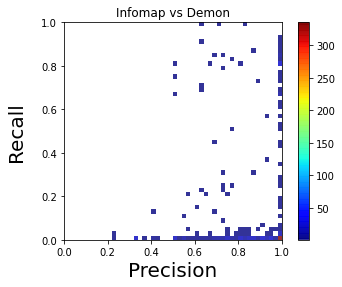

*********
Label Propagation vs Demon:  MatchingResult(score=0.025789572085392145, std=None)
                               Value
Index                               
Ground Truth Communities  230.000000
Identified Communities    172.000000
Community Ratio             0.747826
Ground Truth Matched        0.191304
Node Coverage               1.146255
NF1                         0.025790
   F1 min  F1 max   F1 mean  F1 mode    F1 std
0     0.0    0.94  0.526981      0.0  0.354212


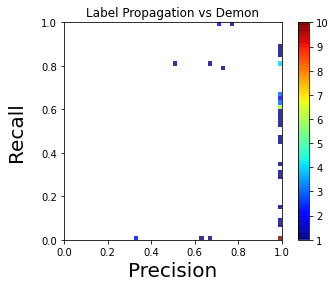

*********
Louvain vs GM:  MatchingResult(score=0.3522312505233501, std=None)
                               Value
Index                               
Ground Truth Communities  236.000000
Identified Communities    185.000000
Community Ratio             0.783898
Ground Truth Matched        0.639831
Node Coverage               1.000000
NF1                         0.352231
   F1 min  F1 max   F1 mean  F1 mode    F1 std
0    0.01     1.0  0.674462      1.0  0.424871


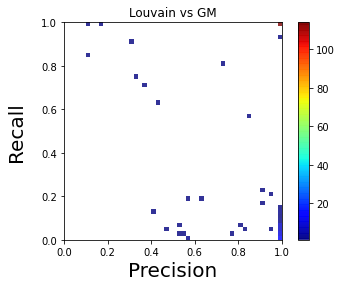

*********
Infomap vs GM:  MatchingResult(score=0.06736221161233014, std=None)
                               Value
Index                               
Ground Truth Communities  236.000000
Identified Communities    706.000000
Community Ratio             2.991525
Ground Truth Matched        0.851695
Node Coverage               1.000000
NF1                         0.067362
   F1 min  F1 max   F1 mean  F1 mode    F1 std
0     0.0     1.0  0.277806      1.0  0.374199


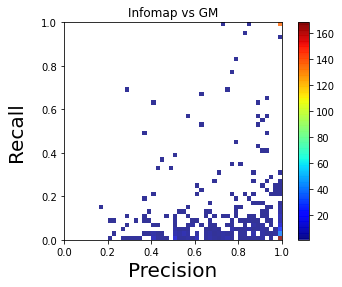

*********
Label Propagation vs GM:  MatchingResult(score=0.06633321100584906, std=None)
                               Value
Index                               
Ground Truth Communities  236.000000
Identified Communities    172.000000
Community Ratio             0.728814
Ground Truth Matched        0.372881
Node Coverage               1.000000
NF1                         0.066333
   F1 min  F1 max   F1 mean  F1 mode    F1 std
0     0.0     1.0  0.347701      1.0  0.449309


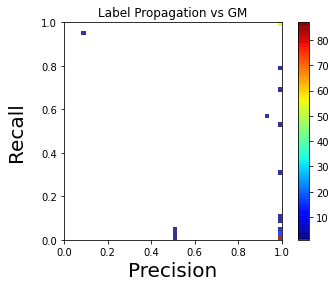

*********
GM vs Demon:  MatchingResult(score=0.07485722372194073, std=None)
                               Value
Index                               
Ground Truth Communities  230.000000
Identified Communities    236.000000
Community Ratio             1.026087
Ground Truth Matched        0.882609
Node Coverage               1.146255
NF1                         0.074857
   F1 min  F1 max   F1 mean  F1 mode    F1 std
0     0.0    0.96  0.098601      0.0  0.262822


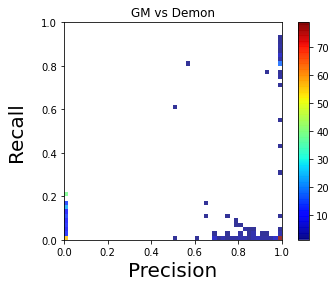

*********


In [38]:
comparison_NF1(louvain_coms, labelprop_coms, "Louvain vs Label Propagation")
comparison_NF1(infomap_coms, labelprop_coms, "Infomap vs Label")
comparison_NF1(louvain_coms, infomap_coms, "Louvain vs Infomap")

comparison_NF1(louvain_coms, demon_coms, "Louvain vs Demon")
comparison_NF1(infomap_coms, demon_coms, "Infomap vs Demon")
comparison_NF1(labelprop_coms, demon_coms, "Label Propagation vs Demon")

comparison_NF1(louvain_coms, GM_coms, "Louvain vs GM")
comparison_NF1(infomap_coms, GM_coms, "Infomap vs GM")
comparison_NF1(labelprop_coms, GM_coms, "Label Propagation vs GM")

comparison_NF1(GM_coms, demon_coms, "GM vs Demon")


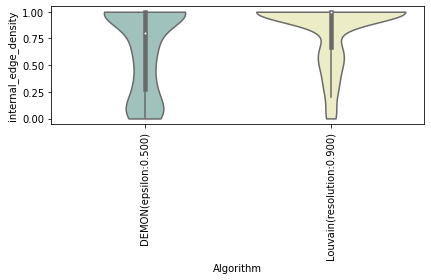

In [39]:
viz.plot_com_stat([demon_coms, louvain_coms], evaluation.internal_edge_density)

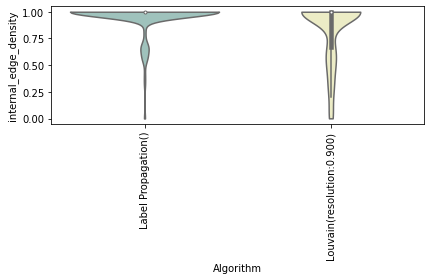

In [40]:
viz.plot_com_stat([labelprop_coms, louvain_coms], evaluation.internal_edge_density)

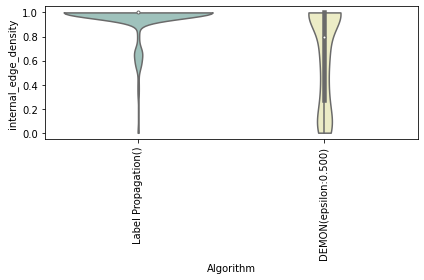

In [41]:
viz.plot_com_stat([labelprop_coms, demon_coms], evaluation.internal_edge_density)

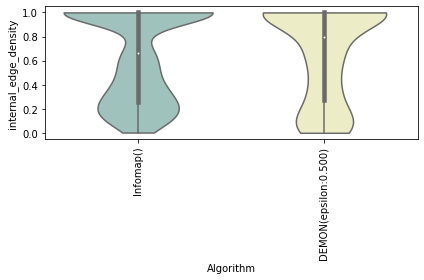

In [42]:
viz.plot_com_stat([infomap_coms, demon_coms], evaluation.internal_edge_density)

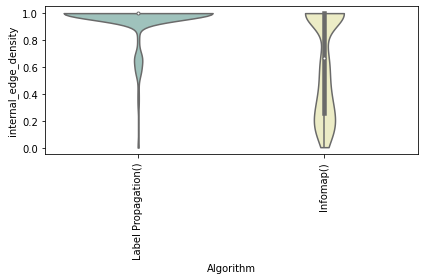

In [43]:
viz.plot_com_stat([labelprop_coms, infomap_coms], evaluation.internal_edge_density)

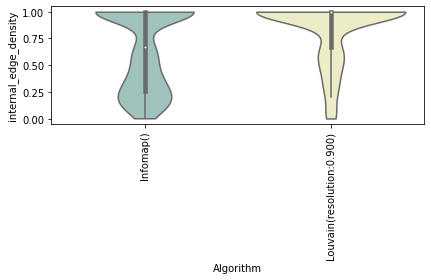

In [44]:
viz.plot_com_stat([infomap_coms, louvain_coms], evaluation.internal_edge_density)

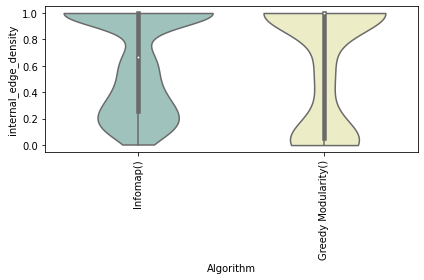

In [45]:
viz.plot_com_stat([infomap_coms, GM_coms], evaluation.internal_edge_density)

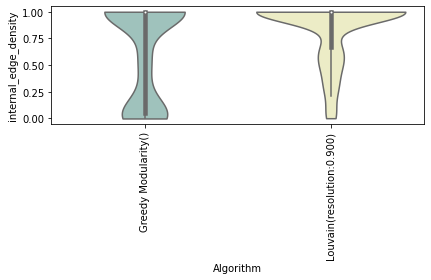

In [46]:
viz.plot_com_stat([GM_coms, louvain_coms], evaluation.internal_edge_density)

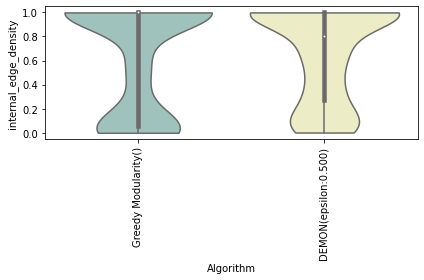

In [47]:
viz.plot_com_stat([GM_coms, demon_coms], evaluation.internal_edge_density)

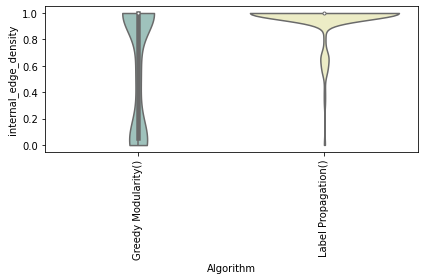

In [48]:
viz.plot_com_stat([GM_coms, labelprop_coms], evaluation.internal_edge_density)

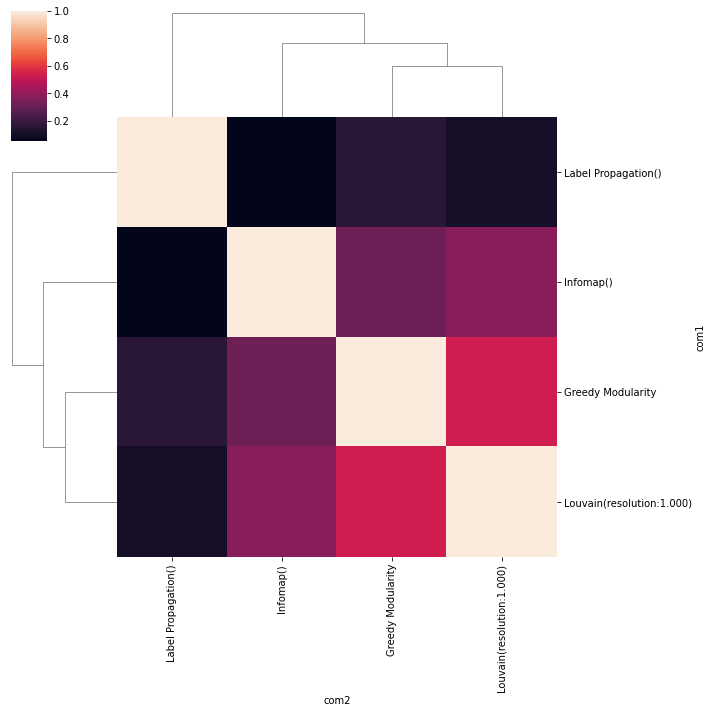

In [49]:
labelprop_coms = algorithms.label_propagation(G)
louvain_coms = algorithms.louvain(G)
infomap_coms = algorithms.infomap(G)
GM_coms = algorithms.greedy_modularity(G)

viz.plot_sim_matrix([labelprop_coms, louvain_coms, infomap_coms, GM_coms],evaluation.adjusted_mutual_information)